This is the analysis for thre when we have and dead layer and without dead layer. for 190 Million events

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Thresholds = 0, 10, 50

## path to root file

In [10]:
# 10 keV
dead_layer_0_thr_0_path      = "../data/nodead_layer_histogram_thr_0.root" # UCNA Dead 1 Micron
dead_layer_630_thr_0_path    = "../data/dead_layer_630nm_histogram_thr_0.root" # UCNA Dead 630nm
dead_layer_1000_thr_0_path   = "../data/dead_layer_histogram_thr_0.root" # UCNA No Dead
dead_layer_3000_thr_0_path   = "../data/ucna_dead_layer_thr_0.root" # UCNA



dead_layer_0_thr_10_path     = "../data/nodead_layer_histogram_all.root" # UCNA Dead 1 Micron
dead_layer_630_thr_10_path   = "../data/dead_layer_630nm_histogram_thr_10.root" # UCNA Dead 630nm
dead_layer_1000_thr_10_path  = "../data/dead_layer_histogram_all.root" # UCNA No Dead
dead_layer_3000_thr_10_path  ="../data/ucna_dead_layer_thr_10.root" # UCNA



#dead_layer_0_thr_50_path     = "../data/nodead_layer_histogram_thr_50.root" # UCNA Dead 1 Micron
#dead_layer_630_thr_50_path   = "../data/dead_layer_630nm_histogram_thr_50.root" # UCNA Dead 630nm
#dead_layer_1000_thr_50_path  = "../data/dead_layer_histogram_thr_50.root" # UCNA No Dead
#dead_layer_3000_thr_50_path  = "../data/ucna_dead_layer_thr_50.root" # UCNA



dead_layer_0_thr_75_path     = "../data/nodead_layer_histogram_thr_75.root" # UCNA Dead 1 Micron
dead_layer_630_thr_75_path   = "../data/dead_layer_630nm_histogram_thr_75.root" # UCNA Dead 630nm
dead_layer_1000_thr_75_path  = "../data/dead_layer_thr_75.root" # UCNA No Dead
dead_layer_3000_thr_75_path  = "../data/ucna_dead_layer_thr_75.root" # UCNA



In [11]:
variables = ['KE;1', 'eTrue1;1', 'eTrue2;1','EdepType01;1', 'EdepType02;1', 'EdepType11;1', 'EdepType12;1', 'EdepType0;1', 'EdepType1;1', 'misEdepType01;1', 'misEdepType02;1', 'misEdepType11;1', 'misEdepType12;1', 'direct01;1', 'direct02;1', 'direct11;1', 'direct12;1',]

In [12]:
angular_variables = [ 'pzE;1','pzKE0;1','pz11;1','pz12;1','pz01;1','pz02;1','pzForward;1','pzBackward;1']

In [14]:
ucnaP_comparison_cases = {
    #thicknesses in nm
    'dead_layer_0': {
        0:  uproot.open(dead_layer_0_thr_0_path),
        10: uproot.open(dead_layer_0_thr_10_path),
      #  50: uproot.open(dead_layer_0_thr_50_path),
        75: uproot.open(dead_layer_0_thr_75_path),
    },
#og ucnap deadlayer
    'dead_layer_630': {
        0:  uproot.open(dead_layer_630_thr_0_path),
        10: uproot.open(dead_layer_630_thr_10_path),
      #  50: uproot.open(dead_layer_630_thr_50_path),
        75: uproot.open(dead_layer_630_thr_75_path),
    },
    'dead_layer_1000': {
        0:  uproot.open(dead_layer_1000_thr_0_path),
        10: uproot.open(dead_layer_1000_thr_10_path),
      #  50: uproot.open(dead_layer_1000_thr_50_path),
        75: uproot.open(dead_layer_1000_thr_75_path),
    },
    #og ucna
    'dead_layer_3000': {
        0: uproot.open(dead_layer_3000_thr_0_path),
        10:uproot.open(dead_layer_3000_thr_10_path),
      # 50:uproot.open(dead_layer_3000_thr_50_path),
        75:uproot.open(dead_layer_3000_thr_75_path),
    }
    

}


In [15]:
ucnaP_df = {}

# Iterate through the outer dictionary (thicknesses)
for thickness, thresholds_dict in ucnaP_comparison_cases.items():
    # Initialize an inner dictionary for each thickness
    ucnaP_df[thickness] = {}
    
    # Iterate through the inner dictionary (thresholds)
    for threshold, file in thresholds_dict.items():
        # Open the ROOT file using uproot
        print(f'Processing {thickness} with threshold {threshold}')
        
        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys (variables)
        for key in variables:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['KE;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[thickness][threshold] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


Processing dead_layer_0 with threshold 0
Processing dead_layer_0 with threshold 10
Processing dead_layer_0 with threshold 75
Processing dead_layer_630 with threshold 0
Processing dead_layer_630 with threshold 10
Processing dead_layer_630 with threshold 75
Processing dead_layer_1000 with threshold 0
Processing dead_layer_1000 with threshold 10
Processing dead_layer_1000 with threshold 75
Processing dead_layer_3000 with threshold 0
Processing dead_layer_3000 with threshold 10
Processing dead_layer_3000 with threshold 75


In [7]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses and thresholds to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
thresholds_to_plot = [0, 10, 50,75]

# Iterate over the thresholds
for threshold in thresholds_to_plot:
    plt.figure(figsize=(10,8))
    
    # Plot each dead layer on the same plot for the current threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.step(df['Evals'], df['KE;1']/190000000, label=f'{dead_layer} nm')
    
    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    plt.ylim(0.0,0.06)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel('Normalised Count', fontsize=14)
    plt.title(f"Histogram distribution of true KE of electron (Threshold {threshold} keV)", fontsize=16)
    
    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/KE_distribution_threshold_{threshold}_keV.png')
    
    # Show plot if needed (optional)
    # plt.show()
    
    # Close the figure to free up memory
    plt.close()


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [8]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses and thresholds to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
thresholds_to_plot = [0,10,50,75]  # Modify this list if you want to include other thresholds like 0, 50, etc.

# Iterate over the thresholds
for threshold in thresholds_to_plot:
    plt.figure(figsize=(10,8))
    
    # Plot each dead layer on the same plot for the current threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.step(df['Evals'], df['EdepType1;1']/190000000, label=f'{dead_layer} nm')
    
    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    plt.ylim(0.0,0.001)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel('Normalised Count', fontsize=14)
    plt.title(f"Histogram distribution of Backscattered events TYPE 1 THR = {threshold} keV", fontsize=16)
    
    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/histogram_distribution_backscattered_events_{threshold}.png')
    
    # Show plot if needed (optional)
    # plt.show()
    
    # Close the figure to free up memory
    plt.close()


In [9]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses and thresholds to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
thresholds_to_plot = [0,10,50,75]  # Modify this list if you want to include other thresholds like 0, 50, etc.

# Iterate over the thresholds
for threshold in thresholds_to_plot:
    plt.figure(figsize=(10,8))
    
    # Plot each dead layer on the same plot for the current threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.step(df['Evals'], df['EdepType0;1']/190000000, label=f'{dead_layer} nm')
    
    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    plt.ylim(0.0,0.07)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel('Normalised Count', fontsize=14)
    plt.title(f"Histogram distribution of Backscattered events TYPE 0 THR = {threshold} keV", fontsize=16)
    
    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/histogram_distribution_direct_events_{threshold}.png')
    
    # Show plot if needed (optional)
    # plt.show()
    
    # Close the figure to free up memory
    plt.close()


In [10]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses and thresholds to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
thresholds_to_plot = [0,10,50,75]  # Modify this list if you want to include other thresholds like 0, 50, etc.

# Iterate over the thresholds
for threshold in thresholds_to_plot:
    plt.figure(figsize=(10,8))
    
    # Plot each dead layer on the same plot for the current threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.step(df['Evals'], df['misEdepType01;1']/190000000, label=f'{dead_layer} nm')
    
    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    plt.yscale('log')
    plt.ylim(0.0,0.0015)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel('Normalised Count', fontsize=14)
    plt.title(f"Histogram distribution of MisBackscattered events TYPE 01 THR = {threshold} keV", fontsize=16)
    
    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/histogram_distribution_MisBs_Type01_events_{threshold}.png')
    
    # Show plot if needed (optional)
    # plt.show()
    
    # Close the figure to free up memory
    plt.close()


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


In [11]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses and thresholds to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
thresholds_to_plot = [0,10,50,75]  # Modify this list if you want to include other thresholds like 0, 50, etc.

# Iterate over the thresholds
for threshold in thresholds_to_plot:
    plt.figure(figsize=(10,8))
    
    # Plot each dead layer on the same plot for the current threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.step(df['Evals'], df['misEdepType02;1']/190000000, label=f'{dead_layer} nm')
    
    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    plt.yscale('log')
    plt.ylim(0.0,0.0015)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel('Normalised Count', fontsize=14)
    plt.title(f"Histogram distribution of MisBackscattered events TYPE 02 THR = {threshold} keV", fontsize=16)
    
    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/histogram_distribution_MisBs_Type02_events_{threshold}.png')
    
    # Show plot if needed (optional)
    # plt.show()
    
    # Close the figure to free up memory
    plt.close()


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


In [5]:
def beta(KE):
    m_e = 511
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta


def asymmetry_measured(N1, N2):
    a  = (N1-N2) / (N1+N2)
    return a

def backscattering_corrections(A_old, A_corrected):
    delta = (A_corrected - A_old) / A_old
    return delta

def error_backscattering_correction(A_new, A_old,err_A_new ,err_A_old):
    delcorr_delAnew = (1/A_old)*err_A_new
    delcorr_delAold = (A_new/(A_old)**2 )*err_A_old
    delcorr = np.sqrt(delcorr_delAnew**2 +delcorr_delAold**2 )
    return delcorr    

def error_asymmetry_beta(N1, N2, mid_beta):
    nTot = N1 + N2
    errA = ((2 * np.sqrt(N1 * N2)) / (nTot ** (3 / 2))) * (1 / (0.5 * mid_beta))
    return errA    

def error_weight(N_initial, N_type0):
    weight = N_type0/N_initial
    err_N_type0 = np.sqrt(N_type0)
    err_N_initial = np.sqrt(N_initial)
    err_weight = weight*((err_N_type0/N_initial) + (weight*(err_N_initial/N_initial)))
    return err_weight

def error_corrected_weighted_asymmetry(err_weight, err_asymmetry, N_initial, N_type0, asymmetry):
    weight = N_type0/N_initial
    err = asymmetry*((err_weight*asymmetry) + (err_asymmetry*weight))        
    return err 

In [6]:
binwidth = 25


# without beta correction

In [16]:
# Iterate over each thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Perform the operations on the DataFrame
        df['raw_asymmetry_thrown']    = asymmetry_measured(df['eTrue1;1'],    df['eTrue2;1'])
        df['raw_asymmetry_type0']     = asymmetry_measured(df['EdepType01;1'],    df['EdepType02;1'])
        df['raw_asymmetry_type1']     = asymmetry_measured(df['EdepType11;1'],    df['EdepType12;1'])
        
        df['asymmetry_thrown_beta']   = asymmetry_measured(df['eTrue1;1'], df['eTrue2;1']) / (beta(df['Evals'] + 0.5*binwidth) / 2)
        df['asymmetry_type0_beta']    = asymmetry_measured(df['EdepType01;1'], df['EdepType02;1']) / (beta(df['Evals']+0.5*binwidth) / 2)
        df['asymmetry_type1_beta']    = asymmetry_measured(df['EdepType11;1'], df['EdepType12;1']) / (beta(df['Evals']+0.5*binwidth) / 2)
     

In [17]:

# Iterate over each thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Perform the operations on the DataFrame
        df['err_asymmetry_thrown_beta']   = error_asymmetry_beta(df['eTrue1;1'], df['eTrue2;1'], beta(df['Evals'] + 0.5*binwidth))
        df['err_asymmetry_type0_beta']    = error_asymmetry_beta(df['EdepType01;1'], df['EdepType02;1'], beta(df['Evals'] + 0.5*binwidth))
        df['err_asymmetry_type1_beta']    = error_asymmetry_beta(df['EdepType11;1'], df['EdepType12;1'], beta(df['Evals'] + 0.5*binwidth))

## thrown


## type 0


## type 1

# with beta correction

## thrown

## type 0 

## type 1

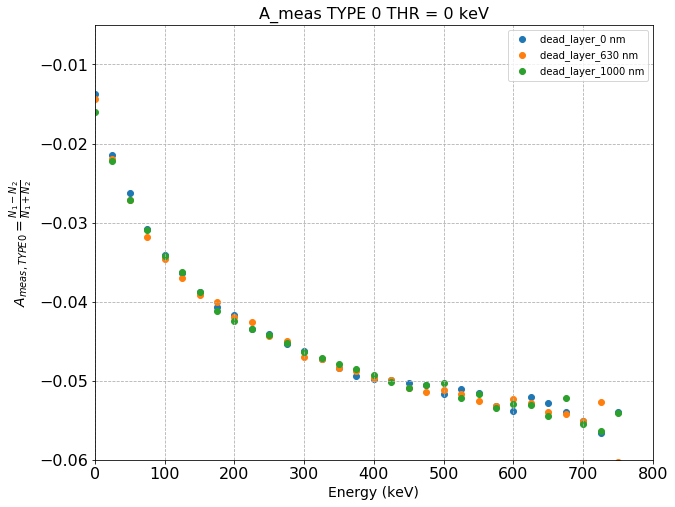

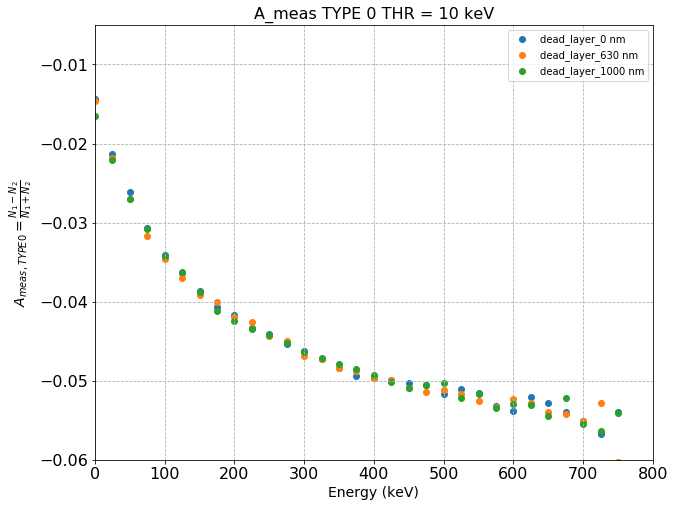

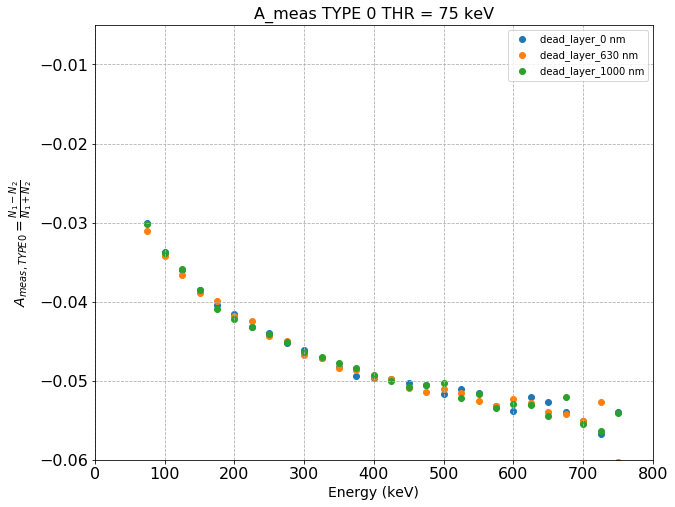

In [20]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
threshold_to_plot = [0,10,75]#  # Fixed threshold value (e.g., 10 keV)
for threshold in threshold_to_plot:

    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.scatter(df['Evals'], df['raw_asymmetry_type0'], label=f'{dead_layer} nm')

    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.06, -0.005)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$A_{meas, TYPE 0}  = \frac{N_1 - N_2}{N_1+N_2}$', fontsize=14)
    plt.title(f"A_meas TYPE 0 THR = {threshold} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/aMeasured_Type0_{threshold}.png')

    # Show the plot if needed
    # plt.show()

    # Close the figure to free up memory
    #plt.close()


In [21]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000']
threshold_to_plot = [0,10,75]  # Fixed threshold value (e.g., 10 keV)
for threshold in thresholds_to_plot:

    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold]
            plt.scatter(df['Evals'], df['raw_asymmetry_type1'], label=f'{dead_layer} nm')

    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.06, -0.005)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$A_{meas, TYPE 0}  = \frac{N_1 - N_2}{N_1+N_2}$', fontsize=14)
    plt.title(f"A_meas TYPE 1 THR = {threshold} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/aMeasured_Type1_{threshold}.png')

    # Show the plot if needed
    # plt.show()

    # Close the figure to free up memory
    plt.close()


NameError: name 'thresholds_to_plot' is not defined

No handles with labels found to put in legend.


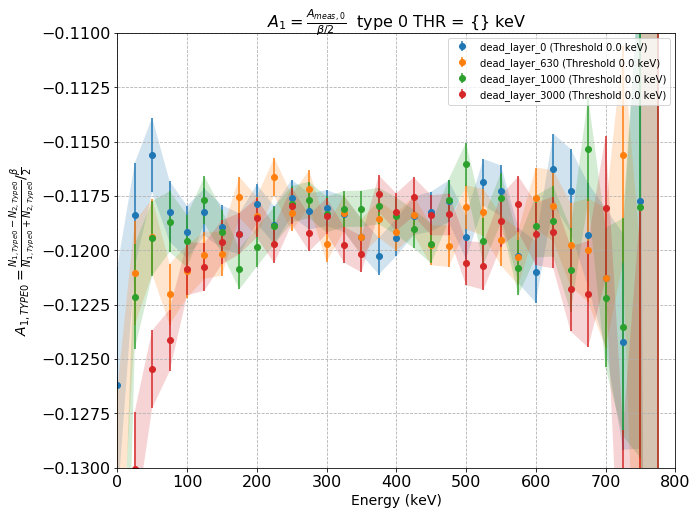

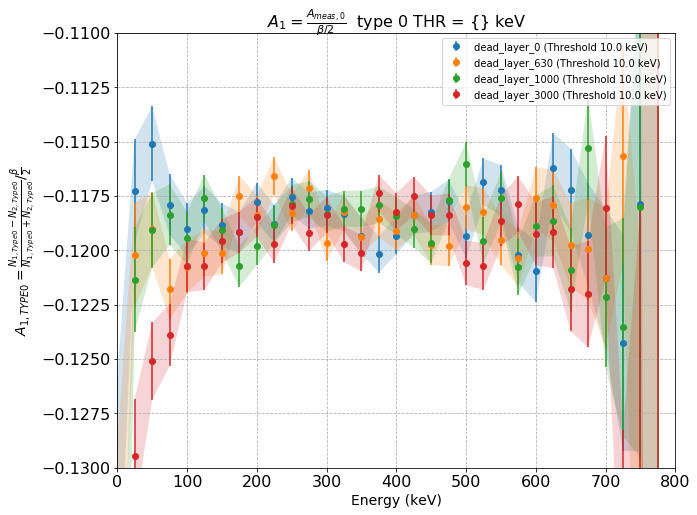

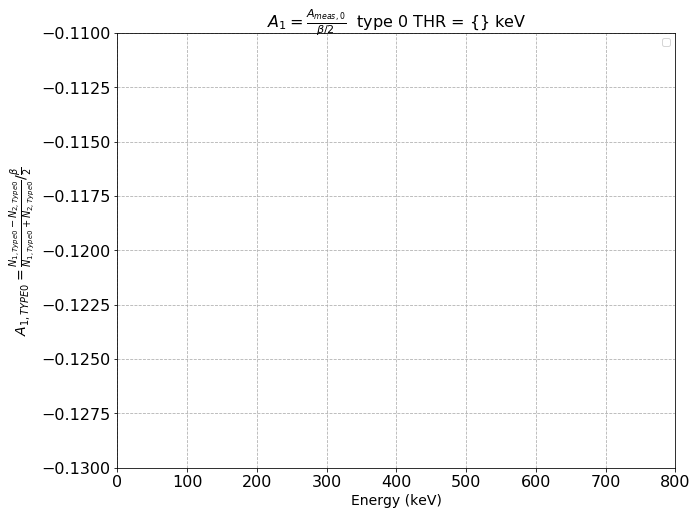

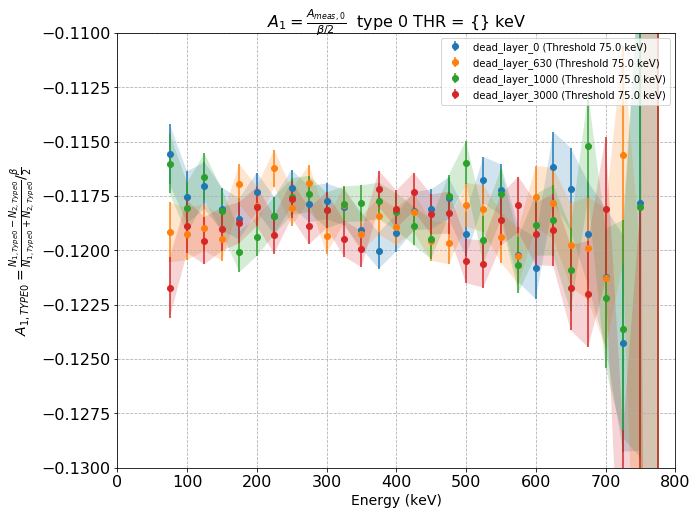

In [24]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000', 'dead_layer_3000']
thresholds = [0.0,10.0,50.0,75.0]  # Fixed threshold value (e.g., 10 keV)
for threshold_to_plot in thresholds:
    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold_to_plot in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold_to_plot]

            # Plot error bars with shaded regions
            plt.errorbar(df['Evals'], df['asymmetry_type0_beta'], yerr=df['err_asymmetry_type0_beta'],
                         fmt='o', label=f'{dead_layer} (Threshold {threshold_to_plot} keV)')

            # Add shaded regions for error bars
            plt.fill_between(df['Evals'], 
                             df['asymmetry_type0_beta'] - df['err_asymmetry_type0_beta'], 
                             df['asymmetry_type0_beta'] + df['err_asymmetry_type0_beta'], 
                             alpha=0.2)

    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.13, -0.11)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$A_{1, TYPE 0}  = \frac{N_{1, Type 0} - N_{2, Type 0}}{N_{1, Type 0}+N_{2, Type 0}} / \frac{\beta}{2}}$', fontsize=14)
    plt.title(r"$A_1 = \frac{A_{meas, 0}}{\beta/2}$  type 0 THR = {} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/a1_type0_{threshold_to_plot}.png')

# Show the plot if needed
# plt.show()

# Close the figure to free up memory
   # plt.close()


No handles with labels found to put in legend.


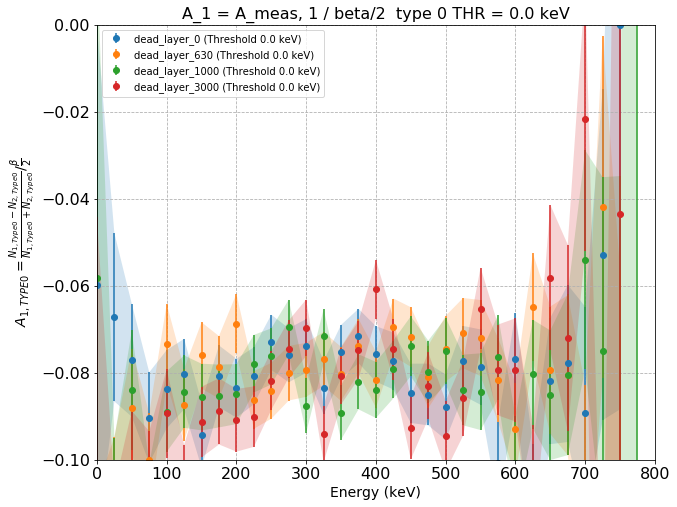

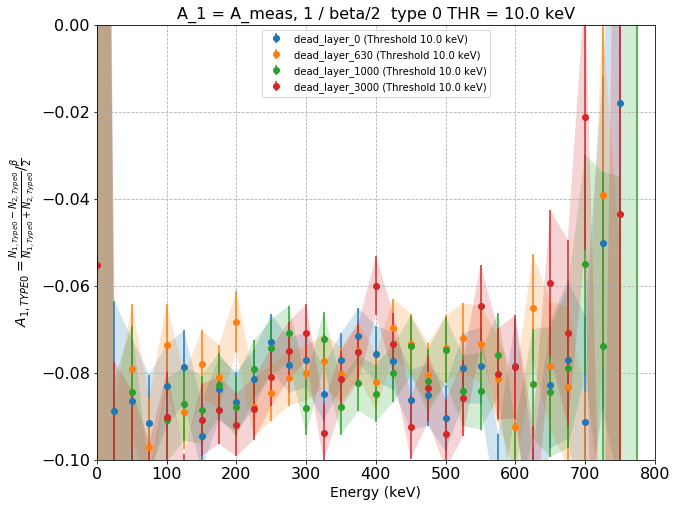

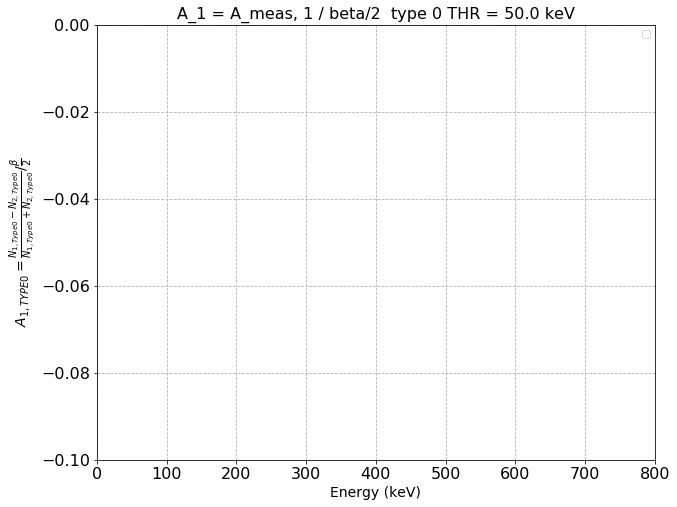

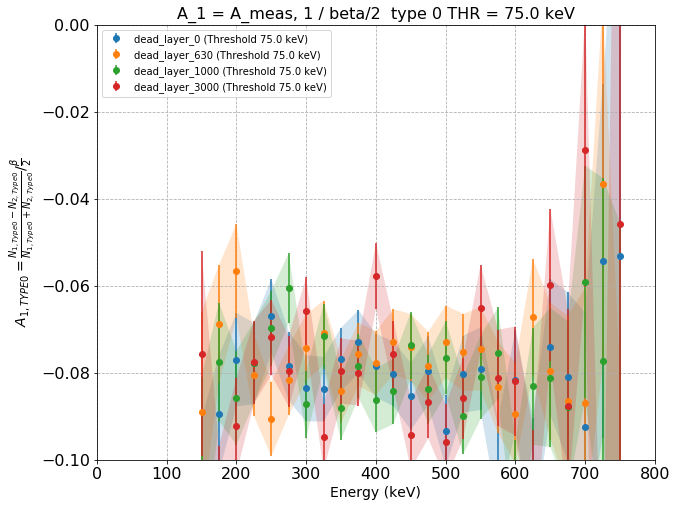

In [25]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000', 'dead_layer_3000']
thresholds = [0.0,10.0,50.0,75.0]  # Fixed threshold value (e.g., 10 keV)
for threshold_to_plot in thresholds:
    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold_to_plot in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold_to_plot]

            # Plot error bars with shaded regions
            plt.errorbar(df['Evals'], df['asymmetry_type1_beta'], yerr=df['err_asymmetry_type1_beta'],
                         fmt='o', label=f'{dead_layer} (Threshold {threshold_to_plot} keV)')

            # Add shaded regions for error bars
            plt.fill_between(df['Evals'], 
                             df['asymmetry_type1_beta'] - df['err_asymmetry_type1_beta'], 
                             df['asymmetry_type1_beta'] + df['err_asymmetry_type1_beta'], 
                             alpha=0.2)

    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.1, 0.0)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$A_{1, TYPE 0}  = \frac{N_{1, Type 0} - N_{2, Type 0}}{N_{1, Type 0}+N_{2, Type 0}} / \frac{\beta}{2}}$', fontsize=14)
    plt.title(f"A_1 = A_meas, 1 / beta/2  type 0 THR = {threshold_to_plot} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/a1_type1_{threshold_to_plot}.png')

# Show the plot if needed
# plt.show()

# Close the figure to free up memory
    #plt.close()


# correct for backscattering

## corrected asymmetry

### type 0

In [26]:
# Iterate over each thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Perform the calculations
        df['Gamma_1_corrected'] = df['EdepType01;1'] - df['misEdepType01;1'] + df['misEdepType02;1']
        df['Gamma_2_corrected'] = df['EdepType02;1'] - df['misEdepType02;1'] + df['misEdepType01;1']
        
        df['corrected_asymmetry_type0_beta'] = asymmetry_measured(df['Gamma_1_corrected'], df['Gamma_2_corrected']) / (beta(df['Evals'] + 0.5*binwidth) / 2)
        df['err_corrected_asymmetry_type0_beta'] = error_asymmetry_beta(df['Gamma_1_corrected'], df['Gamma_2_corrected'], beta(df['Evals'] + 0.5*binwidth))


### type 1

No handles with labels found to put in legend.


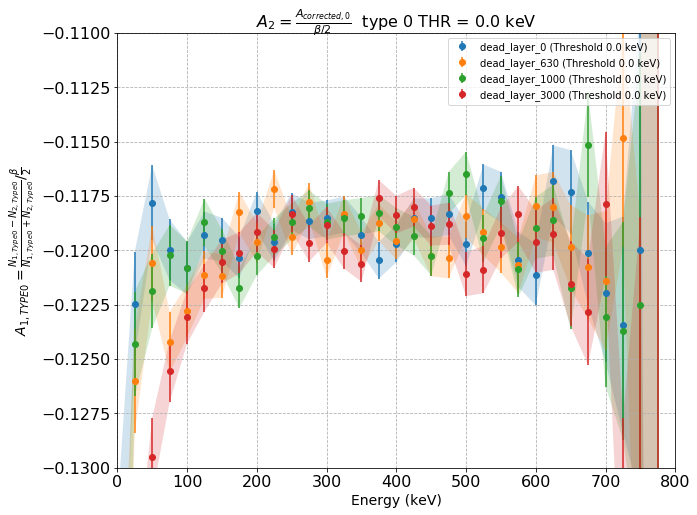

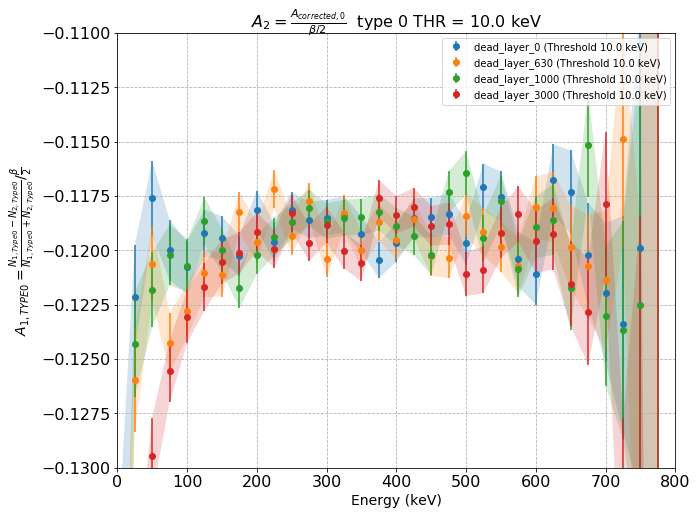

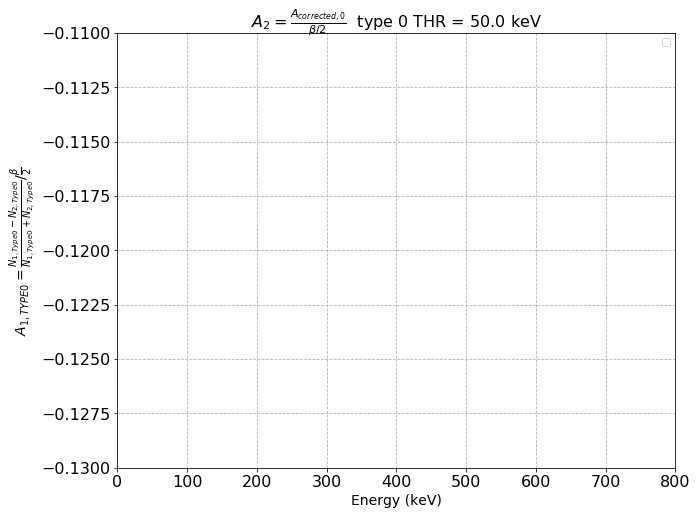

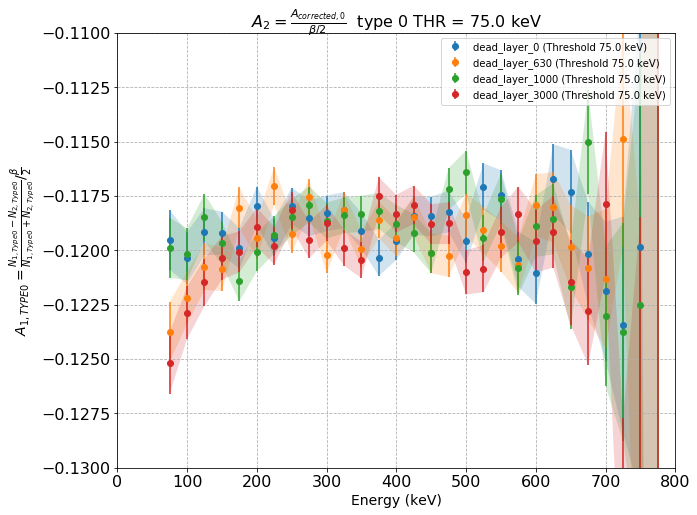

In [27]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000','dead_layer_3000']
thresholds = [0.0,10.0,50.0,75.0]  # Fixed threshold value (e.g., 10 keV)
for threshold_to_plot in thresholds:
    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold_to_plot in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold_to_plot]

            # Plot error bars with shaded regions
            plt.errorbar(df['Evals'], df['corrected_asymmetry_type0_beta'], yerr=df['err_corrected_asymmetry_type0_beta'],
                         fmt='o', label=f'{dead_layer} (Threshold {threshold_to_plot} keV)')

            # Add shaded regions for error bars
            plt.fill_between(df['Evals'], 
                             df['corrected_asymmetry_type0_beta'] - df['err_corrected_asymmetry_type0_beta'], 
                             df['corrected_asymmetry_type0_beta'] + df['err_corrected_asymmetry_type0_beta'], 
                             alpha=0.2)

    # Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.13, -0.11)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$A_{1, TYPE 0}  = \frac{N_{1, Type 0} - N_{2, Type 0}}{N_{1, Type 0}+N_{2, Type 0}} / \frac{\beta}{2}}$', fontsize=14)
   
    plt.title(rf"$A_2 = \frac{{A_{{corrected, 0}}}}{{\beta/2}}$  type 0 THR = {threshold_to_plot} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f'../visualisation/a2_type0_{threshold_to_plot}.png')

# Show the plot if needed
# plt.show()

# Close the figure to free up memory
  #  plt.close()


# Corrections

In [28]:
# Iterate over each thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Estimate correction for misbackscattering
        df['correction_misbs'] = backscattering_corrections(A_old=df['asymmetry_type0_beta'], 
                                                            A_corrected=df['corrected_asymmetry_type0_beta'])
        
        # Estimate error in correction for misbackscattering
        df['err_correction_misbs'] = error_backscattering_correction(A_new=df['corrected_asymmetry_type0_beta'], 
                                                                     A_old=df['asymmetry_type0_beta'], 
                                                                     err_A_new=df['err_corrected_asymmetry_type0_beta'], 
                                                                     err_A_old=df['err_asymmetry_type0_beta'])


No handles with labels found to put in legend.


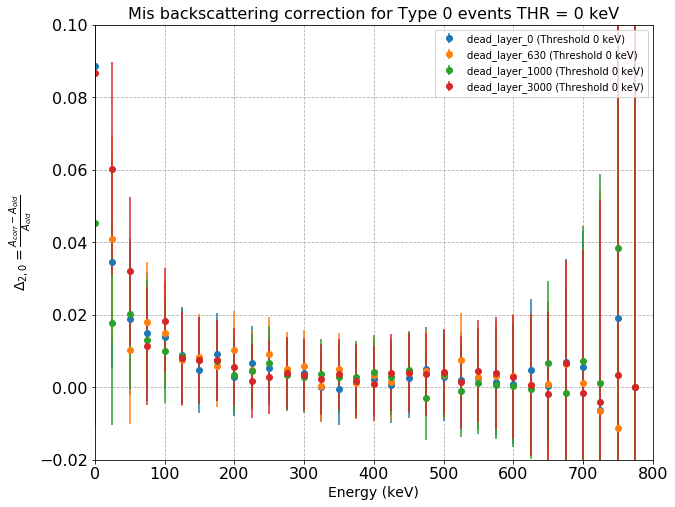

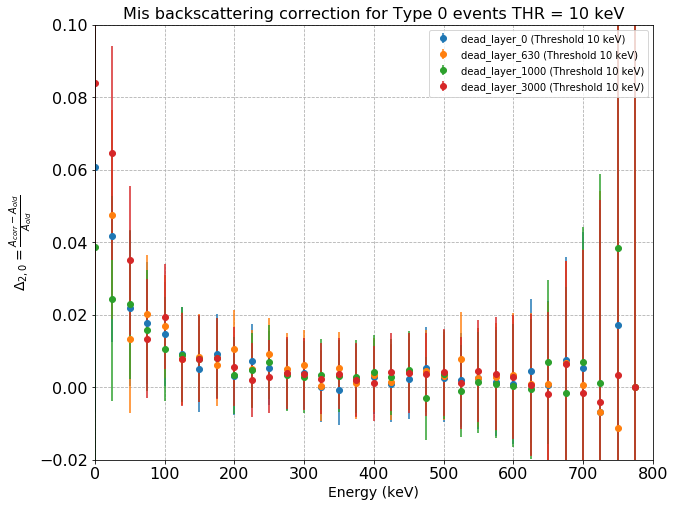

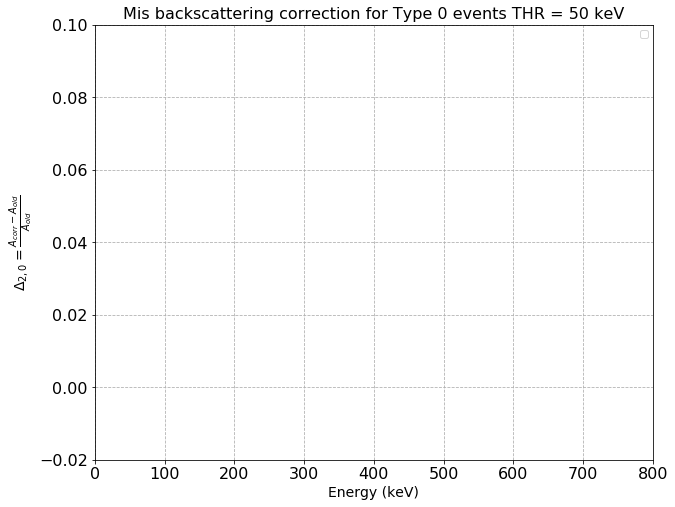

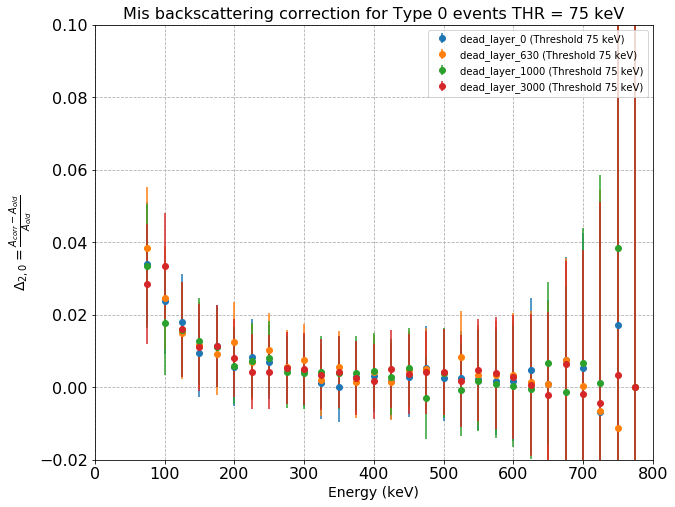

In [29]:
import matplotlib.pyplot as plt

# List of dead layer thicknesses to plot
dead_layers = ['dead_layer_0', 'dead_layer_630', 'dead_layer_1000', 'dead_layer_3000']
thresholds = [0,10,50,75]  # Fixed threshold value (e.g., 10 keV)

for threshold_to_plot in thresholds:
    plt.figure(figsize=(10,8))

    # Plot each dead layer on the same plot for the fixed threshold
    for dead_layer in dead_layers:
        if threshold_to_plot in ucnaP_df[dead_layer]:  # Check if the threshold exists for this dead layer
            df = ucnaP_df[dead_layer][threshold_to_plot]
            plt.errorbar(df['Evals'], df['correction_misbs'], yerr=df['err_correction_misbs'], 
                     fmt='o', label=f'{dead_layer} (Threshold {threshold_to_plot} keV)')


# Plot each dead layer on the same plot for the fixed threshold
         # Plot error bars for correction misbackscattering
            
# Customize the plot
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlim(0,800)
    #plt.yscale('log')
    plt.ylim(-0.02, 0.1)
    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel(r'Energy (keV)', fontsize=14)
    plt.ylabel(r'$\Delta_{2,0} = \frac{A_{corr} - A_{old}}{A_{old}}$', fontsize=14)
    plt.title(rf"Mis backscattering correction for Type 0 events THR = {threshold_to_plot} keV", fontsize=16)

    # Save the plot with a unique filename
    #plt.savefig(f"../visualisation/misbs_correction{threshold_to_plot}_type0.png")


# total correction comparison with the thrown asymmetry 


fit, 
do for type 1 as well
combine
correction total from athrown to corrected asymmetry

In [ ]:
dead.head()

# Fitting of asymmetry over different window

Next Things to do 
1. see if ther are even 1 sigma away or not
2. Do total correction
3. add type 1 as well 
4. Add the values from UCNA
5. Mention the precision

### n within the window

In [30]:
data_types_n = ['KE;1', 'EdepType0;1', 'EdepType1;1']
eLower = [50, 75, 100, 125, 150, 175,190, 200, 225, 250, 275, 300]
eUpper = [600, 625, 650, 675, 740]

# Create a nested dictionary to store the results for each key
nTot = {
    thickness: {
        threshold: {
            col: {
                up: {idx: None for idx in range(len(eLower))} for up in eUpper
            } for col in data_types_n
        } for threshold in ucnaP_comparison_cases[thickness].keys()
    } for thickness in ucnaP_comparison_cases.keys()
}

# Iterate over each dead layer (thickness) and threshold
for thickness, thresholds_dict in ucnaP_comparison_cases.items():
    for threshold, root_file in thresholds_dict.items():
        for col in data_types_n:
            histogram = root_file[col]
            bin_edges = histogram.axis().edges()
            bin_contents = histogram.values()
            
            for idx, lower_value in enumerate(eLower):
                for upper_value in eUpper:
                    # Identify the bin range corresponding to eLower and eUpper
                    bin_start = (bin_edges >= lower_value).nonzero()[0][0]
                    bin_end = (bin_edges <= upper_value).nonzero()[0][-1]
                    
                    # Calculate the total content in the range
                    total_content = sum(bin_contents[bin_start:bin_end])
                    
                    # Store the results in the nested dictionary
                    nTot[thickness][threshold][col][upper_value][idx] = total_content


In [31]:
import pandas as pd

# Initialize the list to store the rows of the DataFrame
data_list_n0 = []
data_types_n = ['KE;1', 'EdepType0;1', 'EdepType1;1']

# Define the columns for the DataFrame
columns_n = ['eLower', 'eUpper', 'n_KE', 'n_Type0', 'n_Type1', 'threshold', 'thickness']

# Iterate over each combination of thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Iterate over each combination of eLower and eUpper and fill the DataFrame
        for up in eUpper:
            for idx, Ewin in enumerate(eLower):
                row = {
                    'eLower': Ewin, 
                    'eUpper': up, 
                    'threshold': threshold, 
                    'thickness': thickness
                }
                
                try:
                    # Assign values from nTot to corresponding columns
                    row['n_KE']    = nTot[thickness][threshold]['KE;1'][up][idx]
                    row['n_Type0'] = nTot[thickness][threshold]['EdepType0;1'][up][idx]
                    row['n_Type1'] = nTot[thickness][threshold]['EdepType1;1'][up][idx]
                except KeyError as e:
                    print(f"KeyError: {e} for thickness={thickness}, threshold={threshold}, up={up}, idx={idx}")
                    row['n_KE'] = row['n_Type0'] = row['n_Type1'] = float('nan')
                
                # Append the constructed row to the data list
                data_list_n0.append(row)

# Create the DataFrame
df_n = pd.DataFrame(data_list_n0, columns=columns_n)

# Print the DataFrame to check
#print(df_n)


In [113]:
df_n

eLower  eUpper         n_KE      n_Type0    n_Type1  threshold  \
0        50     600  174134216.0  170323445.0  3047716.0          0   
1        75     600  167694898.0  163733236.0  2932438.0          0   
2       100     600  160201636.0  156158461.0  2796873.0          0   
3       125     600  151876794.0  147809735.0  2646449.0          0   
4       150     600  142902022.0  138861505.0  2486058.0          0   
..      ...     ...          ...          ...        ...        ...   
715     200     740  131402830.0  127119004.0  1531445.0         75   
716     225     740  121378151.0  117156193.0  1463483.0         75   
717     250     740  111249088.0  107127759.0  1378403.0         75   
718     275     740  101131017.0   97151955.0  1281863.0         75   
719     300     740   91137200.0   87329796.0  1176687.0         75   

           thickness  
0       dead_layer_0  
1       dead_layer_0  
2       dead_layer_0  
3       dead_layer_0  
4       dead_layer_0  
..               ...  
715  dead_layer_1000  
716  dead_layer_1000  
717  dead_layer_1000  
718  dead_layer_1000  
719  dead_layer_1000  

[720 rows x 7 columns]

In [ ]:
df_n.head(2)

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = eLower, y = frac_type0['dead'], c = 'red', label = 'dead layer')
plt.scatter(x = eLower, y = frac_type0['withoutdead'],c = 'green', label = 'without dead layer')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,325)
plt.ylim(0.95,1.0)
plt.grid(linestyle = '--')
plt.legend(fontsize = 16)
plt.xlabel(r'Lower Energy (keV)', fontsize = 14)
plt.ylabel(r'$\frac{\Gamma_{TYPE0}}{\Gamma_{Total}}$', fontsize = 16)
plt.title("Ratio of Type 0 to Total events in the energy window eUpper = 675 keV ", fontsize = 16)


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = eLower, y = frac_type1['dead'], c = 'red')
plt.scatter(x = eLower, y = frac_type1['withoutdead'],c = 'green')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlim(0,325)
plt.ylim(0.013,0.018)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'Lower Energy (keV)', fontsize = 14)
plt.ylabel(r'$\frac{\Gamma_{TYPE1}}{\Gamma_{Total}}$', fontsize = 16)
plt.title("Ratio of Type 1 to Total events in the energy window eUpper = 675 keV ", fontsize = 16)


In [ ]:
ucnaP_df['dead']

In [82]:
import numpy as np
from scipy.optimize import curve_fit

data_types = ['asymmetry_thrown_beta', 'asymmetry_type0_beta', 'corrected_asymmetry_type0_beta', 'correction_misbs']#, 'correction_misbs_thrown']
eLower = [50, 75, 100, 125, 150, 175,190, 200, 225, 250, 275, 300]
eUpper = [600, 625, 650, 675, 740]

# Define your linear function
def linear_function(x, m, b):
    return m * x + b

# Dictionary to store fitted parameters for each data type, thickness, threshold, and eUpper
parameters_dict = {
    thickness: {
        threshold: {
            data_type: {
                up: {
                    'a_values': [None] * len(eLower),
                    'm_values': [None] * len(eLower),
                    'a_errors': [None] * len(eLower)
                } for up in eUpper
            } for data_type in data_types
        } for threshold in ucnaP_comparison_cases[thickness].keys()
    } for thickness in ucnaP_comparison_cases.keys()
}

# Iterate over each data type
for data_type in data_types:
    # Iterate over each dead layer (thickness) in ucnaP_comparison_cases
    for thickness, thresholds_dict in ucnaP_df.items():
        # Iterate over each threshold within the thickness
        for threshold, root_file in thresholds_dict.items():
            # Iterate over each eUpper value
            for up in eUpper:
                # Iterate over each energy in eLower
                for idx, Ewin in enumerate(eLower):
                    # Define the fitting range
                    fitting_range = (Ewin, up)
                    root_file['Emid'] = root_file['Evals'] + binwidth/2
                    x_data = root_file['Emid']  # Assuming 'Emid' exists for x-axis data
                    y_data = root_file[data_type]  # Use the current data type
                    y_error = root_file['err_' + data_type]  # Assuming error columns exist

                    # Filter the data
                    mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1]) & (~np.isnan(y_data))
                    x_data_filtered = x_data[mask]
                    y_data_filtered = y_data[mask]
                    y_error_filtered = y_error[mask]

                    # Perform curve fitting
                    if len(x_data_filtered) > 0:  # Ensure there is data to fit
                        params, covariance = curve_fit(linear_function, x_data_filtered, y_data_filtered, sigma=y_error_filtered)
                        fitted_m = params[0]
                        fitted_b = params[1]
                        errors = np.sqrt(np.diag(covariance))
                        error_m = errors[0]
                        error_b = errors[1]

                        # Store the fitted parameters in the dictionary
                        parameters_dict[thickness][threshold][data_type][up]['a_values'][idx] = fitted_b
                        parameters_dict[thickness][threshold][data_type][up]['m_values'][idx] = fitted_m
                        parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx] = error_b


In [88]:
parameters_dict['dead_layer_0'][10]['asymmetry_thrown_beta'][600]['a_values']

[-0.11701365978050919,
 -0.11738606481060387,
 -0.1174342251707706,
 -0.11731253779285673,
 -0.11722748551558303,
 -0.11737408110461797,
 -0.11715244661038504,
 -0.11715244661038504,
 -0.11724107943335746,
 -0.11731021079232154,
 -0.11784657136913547,
 -0.11805114329858071]

In [ ]:
data_types = ['asymmetry_thrown_beta','asymmetry_type0_beta', 'corrected_asymmetry_type0_beta','correction_misbs', 'correction_misbs_thrown']
eLower = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
eUpper = [600, 625, 650,675]

# Define your linear function
def linear_function(x, m, b):
    return m * x + b

# Dictionary to store fitted parameters for each data type, key (dead and withoutdead), and eUpper
parameters_dict = {
    'dead': {data_type: {up: {'a_values': [[] for _ in eLower],'n_KE': [[] for _ in eLower],'n_Type0': [[] for _ in eLower], 'm_values': [[] for _ in eLower], 'a_errors': [[] for _ in eLower]} for up in eUpper} for data_type in data_types},
    'withoutdead': {data_type: {up: {'a_values': [[] for _ in eLower],'n_KE': [[] for _ in eLower],'n_Type0': [[] for _ in eLower], 'm_values': [[] for _ in eLower], 'a_errors': [[] for _ in eLower]} for up in eUpper} for data_type in data_types}
}

# Iterate over each data type
for data_type in data_types:
    # Iterate over each key in ucnaP_df (assuming they are 'dead' and 'withoutdead')
    for key in ['dead', 'withoutdead']:
        # Iterate over each eUpper value
        for up in eUpper:
            n_KE = []
            n_Type0 = []
            a_values = []
            m_values = []
            a_errors = []
            # Iterate over each energy in eLower
            for idx, Ewin in enumerate(eLower):
                
                fitting_range = (Ewin, up)
                x_data = ucnaP_df[key]['Emid']
                y_data = ucnaP_df[key][data_type]  # Use the current data type
                y_error = ucnaP_df[key]['err_' + data_type]

                # Filter the data
                mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1]) & (~np.isnan(y_data))
                x_data_filtered = x_data[mask]
                y_data_filtered = y_data[mask]
                y_error_filtered = y_error[mask]

                # Perform curve fitting
                if len(x_data_filtered) > 0:  # Ensure there is data to fit
                    params, covariance = curve_fit(linear_function, x_data_filtered, y_data_filtered, sigma=y_error_filtered)
                    fitted_m = params[0]
                    fitted_b = params[1]
                    errors = np.sqrt(np.diag(covariance))
                    error_m = errors[0]
                    error_b = errors[1]
                    parameters_dict[key][data_type][up]['a_values'][idx] = fitted_b
                    parameters_dict[key][data_type][up]['m_values'][idx] = fitted_m
                    parameters_dict[key][data_type][up]['a_errors'][idx] = error_b


In [118]:
import pandas as pd

# Initialize the list to store the rows of the DataFrame
data_list = []

# Define the columns for the DataFrame
columns = [
    'eLower', 'eUpper', 
    'dead_asymmetry_thrown_beta', 'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
    'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta', 'err_dead_corrected_asymmetry_type0_beta',
    'dead_correction_misbs', 'dead_correction_misbs_thrown', 'err_dead_correction_misbs', 'err_dead_correction_misbs_thrown' 
, 'threshold', 'thickness']

# Iterate over each combination of thickness and threshold in ucnaP_df
for thickness, thresholds_dict in ucnaP_df.items():
    for threshold, df in thresholds_dict.items():
        # Iterate over each combination of eLower and eUpper and fill the DataFrame
        for up in eUpper:
            for idx, Ewin in enumerate(eLower):
                row = {
                    'eLower': Ewin, 
                    'eUpper': up, 
                    'threshold': threshold, 
                    'thickness': thickness
                }
                
                # Iterate over data types for the 'dead' case
                for data_type in data_types:
                    if data_type == 'asymmetry_thrown_beta':
                        row['dead_asymmetry_thrown_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_values'][idx]
                        row['err_dead_asymmetry_thrown_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx]

                    elif data_type == 'asymmetry_type0_beta':
                        row['dead_asymmetry_type0_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_values'][idx]
                        row['err_dead_asymmetry_type0_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx]

                    elif data_type == 'corrected_asymmetry_type0_beta':
                        row['dead_corrected_asymmetry_type0_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_values'][idx]
                        row['err_dead_corrected_asymmetry_type0_beta'] = parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx]

                    elif data_type == 'correction_misbs':
                        row['dead_correction_misbs'] = parameters_dict[thickness][threshold][data_type][up]['a_values'][idx]
                        row['err_dead_correction_misbs'] = parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx]
             
                    elif data_type == 'correction_misbs_thrown':
                        row['dead_correction_misbs_thrown'] = parameters_dict[thickness][threshold][data_type][up]['a_values'][idx]
                        row['err_dead_correction_misbs_thrown'] = parameters_dict[thickness][threshold][data_type][up]['a_errors'][idx]

                
                # Append the constructed row to the data list
                data_list.append(row)

# Create the DataFrame
fit_values_df = pd.DataFrame(data_list, columns=columns)

# Check the DataFrame



In [119]:
fit_values_df['dead_precision_type0_corrected_asymmetry'] = fit_values_df['err_dead_corrected_asymmetry_type0_beta']/ fit_values_df['dead_corrected_asymmetry_type0_beta']


In [120]:
fit_values_df['dead_precision_type0_correction'] = fit_values_df['err_dead_correction_misbs']/ fit_values_df['dead_correction_misbs']


In [122]:
fit_values_df.columns

Index(['eLower', 'eUpper', 'dead_asymmetry_thrown_beta',
       'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
       'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta',
       'err_dead_corrected_asymmetry_type0_beta', 'dead_correction_misbs',
       'dead_correction_misbs_thrown', 'err_dead_correction_misbs',
       'err_dead_correction_misbs_thrown', 'threshold', 'thickness',
       'dead_precision_type0_corrected_asymmetry',
       'dead_precision_type0_correction'],
      dtype='object')

In [116]:
df_n.columns


Index(['eLower', 'eUpper', 'n_KE', 'n_Type0', 'n_Type1', 'threshold',
       'thickness'],
      dtype='object')

In [117]:
df.columns

Index(['KE;1', 'eTrue1;1', 'eTrue2;1', 'EdepType01;1', 'EdepType02;1',
       'EdepType11;1', 'EdepType12;1', 'EdepType0;1', 'EdepType1;1',
       'misEdepType01;1', 'misEdepType02;1', 'misEdepType11;1',
       'misEdepType12;1', 'direct01;1', 'direct02;1', 'direct11;1',
       'direct12;1', 'Evals', 'raw_asymmetry_thrown', 'raw_asymmetry_type0',
       'raw_asymmetry_type1', 'asymmetry_thrown_beta', 'asymmetry_type0_beta',
       'asymmetry_type1_beta', 'err_asymmetry_thrown_beta',
       'err_asymmetry_type0_beta', 'err_asymmetry_type1_beta',
       'Gamma_1_corrected', 'Gamma_2_corrected',
       'corrected_asymmetry_type0_beta', 'err_corrected_asymmetry_type0_beta',
       'correction_misbs', 'err_correction_misbs', 'Emid'],
      dtype='object')

In [123]:
# Merging the DataFrames on the common columns
merged_df = pd.merge(fit_values_df, df_n, on=['eLower', 'eUpper', 'threshold', 'thickness'])

merged_df.head(2)



eLower  eUpper  dead_asymmetry_thrown_beta  dead_asymmetry_type0_beta  \
0      50     600                   -0.117014                  -0.118347   
1      75     600                   -0.117386                  -0.118600   

   dead_corrected_asymmetry_type0_beta  err_dead_asymmetry_thrown_beta  \
0                            -0.119622                        0.000527   
1                            -0.119778                        0.000457   

   err_dead_asymmetry_type0_beta  err_dead_corrected_asymmetry_type0_beta  \
0                       0.000540                                 0.000527   
1                       0.000532                                 0.000545   

   dead_correction_misbs  dead_correction_misbs_thrown  \
0               0.010736                           NaN   
1               0.009923                           NaN   

   err_dead_correction_misbs  err_dead_correction_misbs_thrown  threshold  \
0                   0.001682                               NaN          0   
1                   0.001636                               NaN          0   

      thickness  dead_precision_type0_corrected_asymmetry  \
0  dead_layer_0                                 -0.004409   
1  dead_layer_0                                 -0.004552   

   dead_precision_type0_correction         n_KE      n_Type0    n_Type1  
0                         0.156660  174134216.0  170323445.0  3047716.0  
1                         0.164863  167694898.0  163733236.0  2932438.0

In [ ]:
merged_df.columns

In [126]:
merged_df['weighted_corrected_asymmetry_type0'] = merged_df['dead_corrected_asymmetry_type0_beta']*(merged_df['n_Type0']/merged_df['n_KE'])


In [127]:
merged_df['dead_err_weight'] = error_weight(merged_df['n_KE'], merged_df['n_Type0'])


In [128]:
merged_df['err_dead_weighted_corrected_asymmetry_type0'] = error_corrected_weighted_asymmetry(merged_df['dead_err_weight'],merged_df['err_dead_corrected_asymmetry_type0_beta'],merged_df['n_KE'], merged_df['n_Type0'],merged_df['dead_corrected_asymmetry_type0_beta'] )


In [129]:
merged_df.to_csv('../ucnaPlus_dead_all_thickness_all_threshold_10.csv')

In [130]:
merged_df

eLower  eUpper  dead_asymmetry_thrown_beta  dead_asymmetry_type0_beta  \
0        50     600                   -0.117014                  -0.118347   
1        75     600                   -0.117386                  -0.118600   
2       100     600                   -0.117434                  -0.118654   
3       125     600                   -0.117313                  -0.118548   
4       150     600                   -0.117227                  -0.118633   
..      ...     ...                         ...                        ...   
715     200     740                   -0.117263                  -0.117610   
716     225     740                   -0.116470                  -0.116993   
717     250     740                   -0.116404                  -0.116603   
718     275     740                   -0.116182                  -0.116622   
719     300     740                   -0.116197                  -0.116822   

     dead_corrected_asymmetry_type0_beta  err_dead_asymmetry_thrown_beta  \
0                              -0.119622                        0.000527   
1                              -0.119778                        0.000457   
2                              -0.119723                        0.000492   
3                              -0.119458                        0.000534   
4                              -0.119448                        0.000593   
..                                   ...                             ...   
715                            -0.118733                        0.000832   
716                            -0.118141                        0.000837   
717                            -0.117676                        0.000957   
718                            -0.117510                        0.001100   
719                            -0.117744                        0.001286   

     err_dead_asymmetry_type0_beta  err_dead_corrected_asymmetry_type0_beta  \
0                         0.000540                                 0.000527   
1                         0.000532                                 0.000545   
2                         0.000575                                 0.000589   
3                         0.000628                                 0.000621   
4                         0.000699                                 0.000694   
..                             ...                                      ...   
715                       0.000797                                 0.000851   
716                       0.000841                                 0.000911   
717                       0.000942                                 0.001015   
718                       0.001091                                 0.001172   
719                       0.001273                                 0.001367   

     dead_correction_misbs  dead_correction_misbs_thrown  ...  threshold  \
0                 0.010736                           NaN  ...          0   
1                 0.009923                           NaN  ...          0   
2                 0.009012                           NaN  ...          0   
3                 0.007675                           NaN  ...          0   
4                 0.006879                           NaN  ...          0   
..                     ...                           ...  ...        ...   
715               0.009475                           NaN  ...         75   
716               0.009718                           NaN  ...         75   
717               0.009089                           NaN  ...         75   
718               0.007528                           NaN  ...         75   
719               0.007794                           NaN  ...         75   

           thickness  dead_precision_type0_corrected_asymmetry  \
0       dead_layer_0                                 -0.004409   
1       dead_layer_0                                 -0.004552   
2       dead_layer_0                                 -0.004918   
3       dead_layer_0         

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox,  HBox, VBox

In [ ]:
df = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox,  HBox, VBox

# Sample DataFrame similar to your df

# Unique eUpper values
unique_eUpper = merged_df['eUpper'].unique()

# Create checkboxes for each eUpper value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
# Create checkboxes for asymmetry type
checkboxes_asymmetry = {
    'dead_weighted_corrected_asymmetry_type0': Checkbox(value=True, description='weighted With Dead Layer Corrected'),
     
    'dead_corrected_asymmetry_type0_beta': Checkbox(value=True, description='With Dead Layer Corrected'),
    
    'dead_asymmetry_type0_beta': Checkbox(value=True, description='With Dead Layer'),
    
    'dead_asymmetry_thrown_beta': Checkbox(value=True, description='With Dead Layer THROWN'),
   


# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for asymmetry in checkboxes_asymmetry.keys():
                if kwargs[asymmetry]:
                    subset = merged_df[merged_df['eUpper'] == eUpper]
                    plt.errorbar(subset['eLower'], subset[asymmetry], 
                                 yerr=subset['err_' + asymmetry], fmt='o', 
                                 label=f'{asymmetry.replace("_", " ").title()} (eUpper = {eUpper})')
    plt.xlabel('eLower', fontsize = 16)
    plt.ylabel(r'fitted $A_{Type 0}$',fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.ylim(-0.125,-0.11)
    plt.yticks(np.arange(-0.125,0-0.11,0.0005))
    plt.xlim(0,350)
    plt.xticks(np.arange(0,350,25),fontsize = 16)
    plt.axhline(y = -0.11749, c = 'black', label = r'$A_{sim}$')
    plt.grid(linestyle = '--')
    plt.title('Corrected Asymmetry Type 0 - DEAD Layer ', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_asymmetry.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{key: checkboxes_asymmetry[key] for key in checkboxes_asymmetry})


SyntaxError: invalid syntax (<ipython-input-133-f53a5ce814e6>, line 26)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox
df = merged_df
# Assuming the DataFrame has
# Unique eUpper, threshold, and thickness values
# Unique eUpper, threshold, and thickness values
unique_eUpper = df['eUpper'].unique()
unique_thresholds = df['threshold'].unique()
# Unique eUpper, threshold, and thickness values

# Define specific colors for thicknesses 0, 630, and 1000
color_map = {
    0: 'blue',
    630: 'orange',
    1000: 'green'
}

# Create checkboxes for each eUpper and threshold value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
checkboxes_thresholds = {str(threshold): Checkbox(value=True, description=str(threshold)) for threshold in unique_thresholds}

# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for threshold in unique_thresholds:
                if kwargs[str(threshold)]:
                    for thickness in color_map.keys():  # Only consider thicknesses 0, 630, 1000
                        subset = df[(df['eUpper'] == eUpper) & (df['threshold'] == int(threshold)) & (df['thickness'] == thickness)]
                        plt.errorbar(subset['eLower'], subset['dead_correction_misbs'], 
                                     yerr=subset['err_dead_correction_misbs'], fmt='o', 
                                     label=f'Thickness = {thickness}, eUpper = {eUpper}, Threshold = {threshold}',
                                     color=color_map[thickness])
    plt.xlabel('eLower', fontsize=16)
    plt.ylabel(r'Corrections Misbs Type 0', fontsize=16)
    plt.yticks(np.arange(-0.0025, 0.03, 0.001), fontsize=16)
    plt.ylim(-0.0025, 0.03)
    plt.xlim(0, 350)
    plt.xticks(np.arange(0, 350, 25), fontsize=16)
    plt.grid(linestyle='--')
    plt.title('Mis-Backscattered Correction for Type 0 - Dead Layer', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_thresholds.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{str(threshold): checkboxes_thresholds[str(threshold)] for threshold in unique_thresholds})

In [141]:
df['thickness'].unique()

array(['dead_layer_0', 'dead_layer_630', 'dead_layer_1000'], dtype=object)

In [146]:

# Unique eUpper, threshold, and thickness values
unique_eUpper = df['eUpper'].unique()
unique_thresholds = df['threshold'].unique()
unique_thicknesses = df['thickness'].unique()

# Define specific colors for the string-based thicknesses
color_map = {
    'dead_layer_0': 'blue',
    'dead_layer_630': 'orange',
    'dead_layer_1000': 'green'
}

# Create checkboxes for each eUpper and threshold value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
checkboxes_thresholds = {str(threshold): Checkbox(value=True, description=str(threshold)) for threshold in unique_thresholds}

# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for threshold in unique_thresholds:
                if kwargs[str(threshold)]:
                    for thickness in color_map.keys():  # Only consider thicknesses '0', '630', '1000'
                        subset = df[(df['eUpper'] == eUpper) & (df['threshold'] == int(threshold)) & (df['thickness'] == thickness)]
                        if not subset.empty:  # Check if there is data to plot
                           # print(f"Plotting {len(subset)} points for Thickness = {thickness}, eUpper = {eUpper}, Threshold = {threshold}")
                            plt.errorbar(subset['eLower'], subset['dead_correction_misbs'], 
                                         yerr=subset['err_dead_correction_misbs'], fmt='o', 
                                         label=f'Thickness = {thickness} nm, eUpper = {eUpper} keV, Thr = {threshold} keV',
                                         color=color_map[thickness])
                        else:
                            print(f"No data for Thickness = {thickness}, eUpper = {eUpper}, Threshold = {threshold}")
    plt.xlabel('eLower', fontsize=16)
    plt.ylabel(r'Corrections Misbs Type 0', fontsize=16)
    plt.yticks(np.arange(-0.0025, 0.03, 0.002), fontsize=16)
    plt.ylim(-0.0025, 0.03)
    plt.xlim(0, 350)
    plt.xticks(np.arange(0, 350, 25), fontsize=16)
    plt.grid(linestyle='--')
    plt.title('Mis-Backscattered Correction for Type 0', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_thresholds.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{str(threshold): checkboxes_thresholds[str(threshold)] for threshold in unique_thresholds})

interactive(children=(Checkbox(value=True, description='600'), Checkbox(value=True, description='625'), Checkb…

<function __main__.update_and_save_plot(**kwargs)>

In [149]:
merged_df.columns

Index(['eLower', 'eUpper', 'dead_asymmetry_thrown_beta',
       'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
       'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta',
       'err_dead_corrected_asymmetry_type0_beta', 'dead_correction_misbs',
       'dead_correction_misbs_thrown', 'err_dead_correction_misbs',
       'err_dead_correction_misbs_thrown', 'threshold', 'thickness',
       'dead_precision_type0_corrected_asymmetry',
       'dead_precision_type0_correction', 'n_KE', 'n_Type0', 'n_Type1',
       'weighted_corrected_asymmetry_type0', 'dead_err_weight',
       'err_dead_weighted_corrected_asymmetry_type0'],
      dtype='object')

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox

# Load the data from the uploaded CSV file
#df = pd.read_csv('/mnt/data/ucnaPlus_dead_all_thickness_all_threshold_10.csv')
df =merged_df
# Unique eUpper, threshold, and thickness values
unique_eUpper = df['eUpper'].unique()
unique_thresholds = df['threshold'].unique()
unique_thicknesses = df['thickness'].unique()

# Define specific colors for the string-based thicknesses
color_map = {
    'dead_layer_0': 'blue',
    'dead_layer_630': 'orange',
    'dead_layer_1000': 'green'
}

# Create checkboxes for each eUpper and threshold value
checkboxes_eUpper = {str(eUpper): Checkbox(value=True, description=str(eUpper)) for eUpper in unique_eUpper}
checkboxes_thresholds = {str(threshold): Checkbox(value=True, description=str(threshold)) for threshold in unique_thresholds}

# Create checkboxes for data types
checkboxes_data_type = {
  #  'dead_asymmetry_type0_beta': Checkbox(value=True, description='Dead Correction Misbs'),
    'dead_corrected_asymmetry_type0_beta': Checkbox(value=True, description='Corrected Asymmetry Type 0')
}

# Function to update plot and save it
def update_and_save_plot(**kwargs):
    plt.figure(figsize=(12, 10))
    for eUpper in unique_eUpper:
        if kwargs[str(eUpper)]:
            for threshold in unique_thresholds:
                if kwargs[str(threshold)]:
                    for thickness in color_map.keys():  # Only consider specified thicknesses
                        subset = df[(df['eUpper'] == eUpper) & (df['threshold'] == int(threshold)) & (df['thickness'] == thickness)]
                        if not subset.empty:  # Check if there is data to plot
                            for data_type in checkboxes_data_type.keys():
                                if kwargs[data_type]:
                                    plt.errorbar(subset['eLower'], subset[data_type], 
                                                 yerr=subset['err_' + data_type], fmt='o', 
                                                 label=f'(Thickness = {thickness} nm, eUpper = {eUpper} keV, Thr = {threshold} keV)',
                                                 color=color_map[thickness])
                        else:
                            print(f"No data for Thickness = {thickness}, eUpper = {eUpper}, Threshold = {threshold}")
    plt.xlabel('eLower', fontsize=16)
    plt.ylabel('Fit Corrected Asymmetry_T', fontsize=16)
    plt.yticks( fontsize=16)
    plt.ylim(-0.14, -0.1)
    plt.xlim(0, 350)
    plt.xticks(np.arange(0, 350, 25), fontsize=16)
    plt.grid(linestyle='--')
    plt.title(' Corrected Asymmetry Type 0', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

# Combine all checkboxes into a single widget
widgets = list(checkboxes_eUpper.values()) + list(checkboxes_thresholds.values()) + list(checkboxes_data_type.values())
interact(update_and_save_plot, **{str(eUpper): checkboxes_eUpper[str(eUpper)] for eUpper in unique_eUpper},
         **{str(threshold): checkboxes_thresholds[str(threshold)] for threshold in unique_thresholds},
         **{data_type: checkboxes_data_type[data_type] for data_type in checkboxes_data_type})


interactive(children=(Checkbox(value=True, description='600'), Checkbox(value=True, description='625'), Checkb…

<function __main__.update_and_save_plot(**kwargs)>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the uploaded CSV file
df = pd.read_csv('../ucnaPlus_dead_all_thickness_all_threshold_10.csv')

# Function to create and save heatmap for a specific thickness and threshold
def create_heatmap(thickness, threshold):
    # Filter the DataFrame based on the selected thickness and threshold
    filtered_df = df[(df['thickness'] == thickness) & (df['threshold'] == threshold)]
    
    # Pivot the DataFrame to prepare for heatmap
    pivot_table = filtered_df.pivot('eLower', 'eUpper', 'dead_correction_misbs')

    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma", annot_kws={"size": 16}, vmin=0.0, vmax=0.011)

    # Increase font size for axis labels and title
    plt.xlabel('Upper', fontsize=16)
    plt.ylabel('Lower', fontsize=16)

    # Increase font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Title and saving the plot
    title = f"Heatmap of  dead $\Delta_{{TYPE 0}}$ - {thickness} nm, {threshold} keV threshold"
    plt.title(title, fontsize=20)
    #plt.savefig(f'../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_{thickness}_{threshold}.png')
    #plt.savefig(f'../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_{thickness}_{threshold}.eps')

    # Show the plot




    plt.show()

# Example usage
create_heatmap('dead_layer_0', 0)
create_heatmap('dead_layer_0', 10)
create_heatmap('dead_layer_0', 50)
create_heatmap('dead_layer_0', 75)

create_heatmap('dead_layer_630', 0)
create_heatmap('dead_layer_630', 10)
create_heatmap('dead_layer_630', 50)
create_heatmap('dead_layer_630', 75)

create_heatmap('dead_layer_1000', 0)
create_heatmap('dead_layer_1000', 10)
create_heatmap('dead_layer_1000', 50)
create_heatmap('dead_layer_1000', 75)


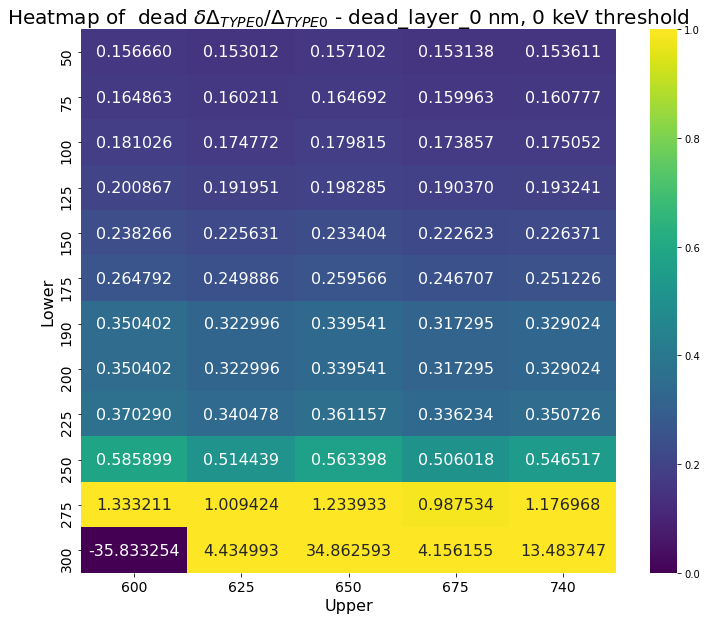

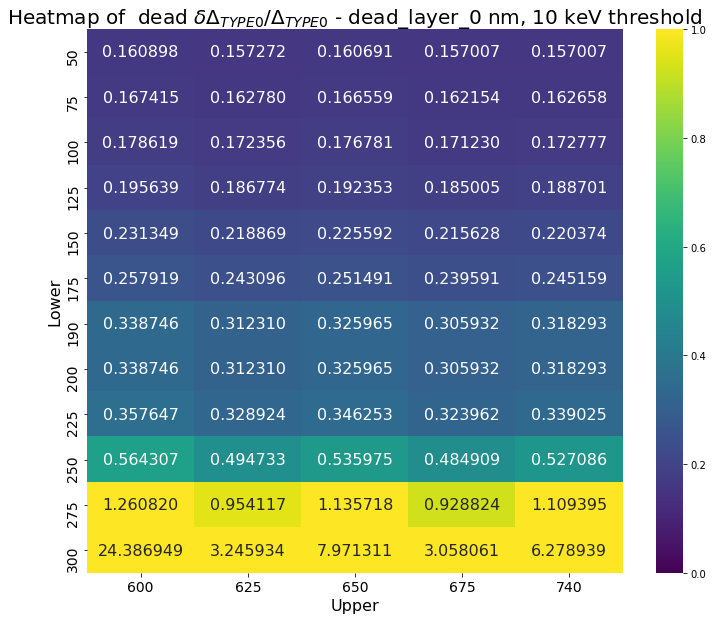

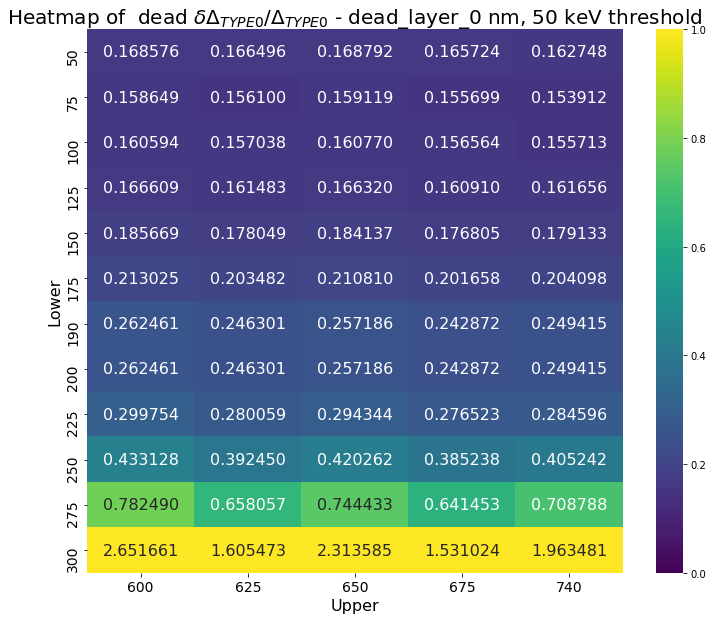

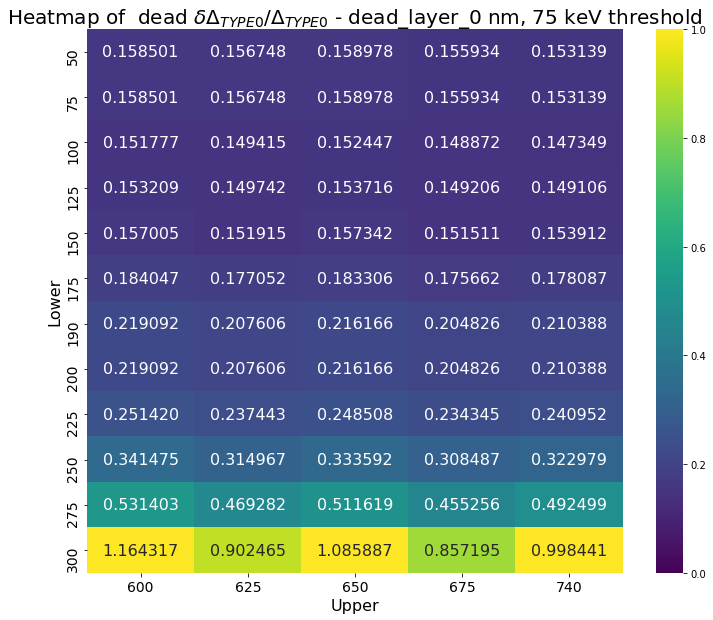

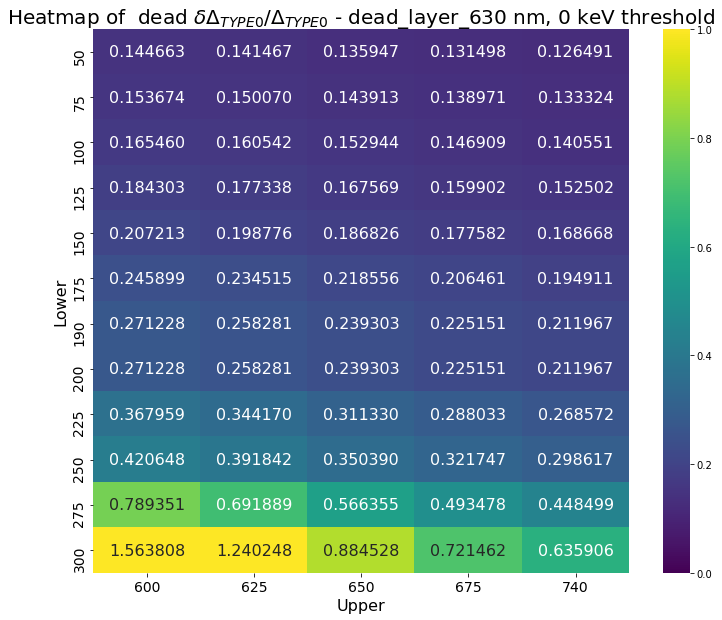

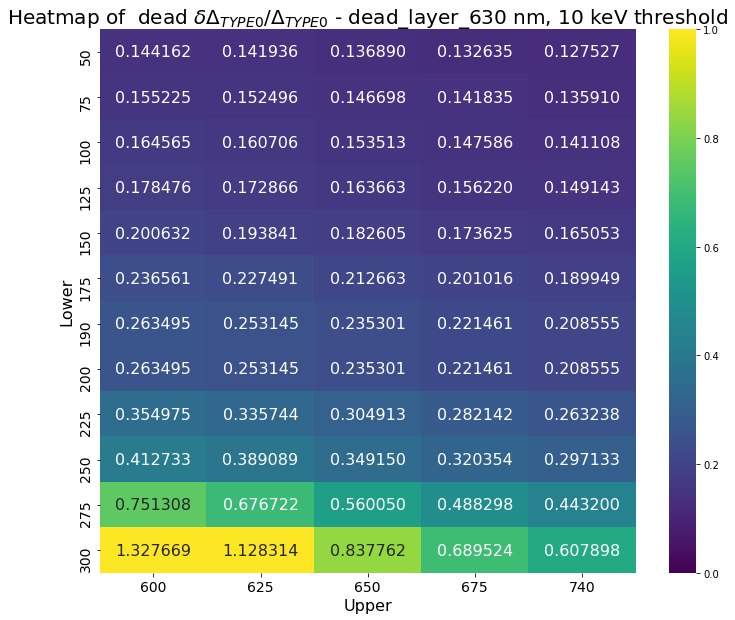

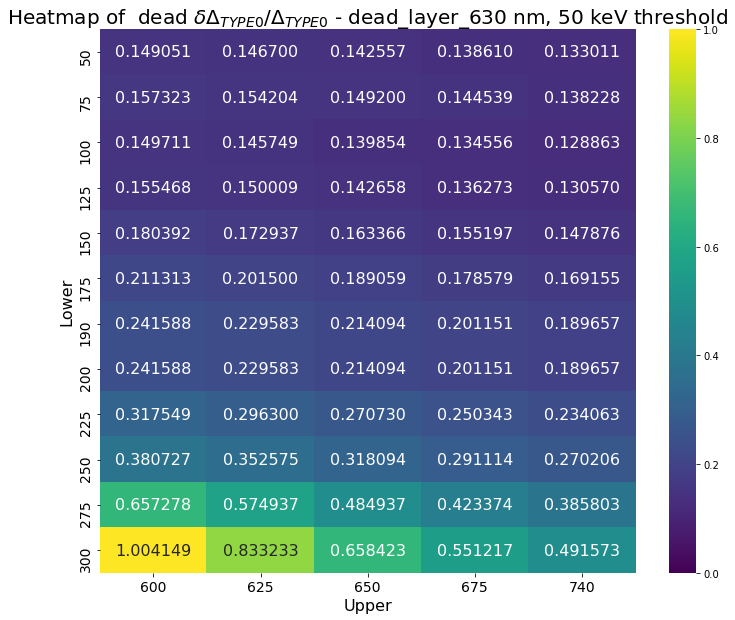

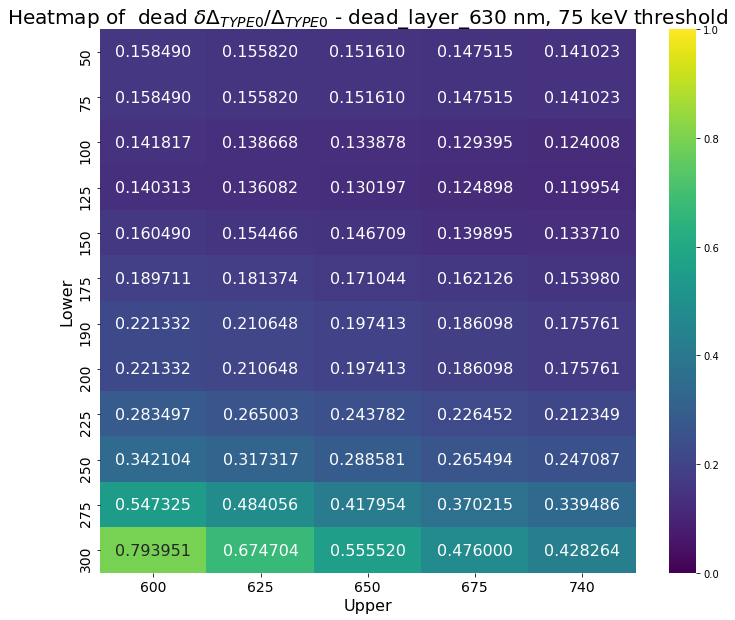

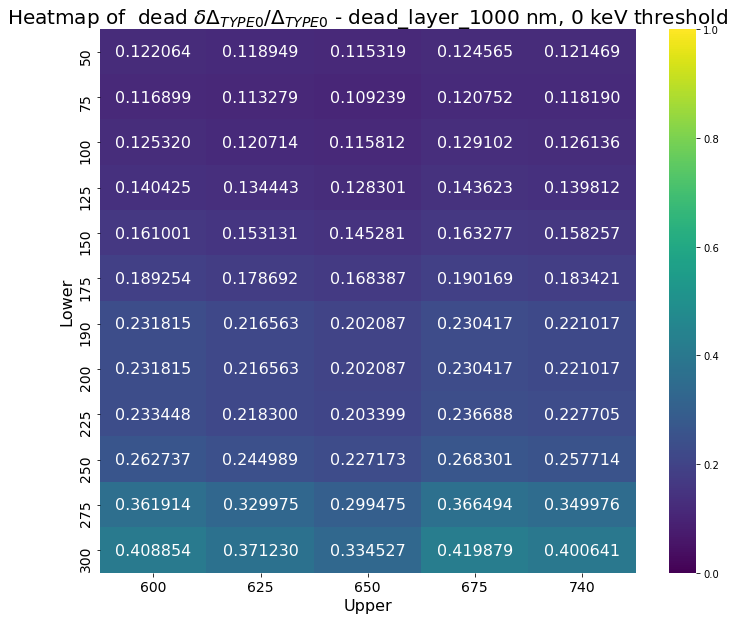

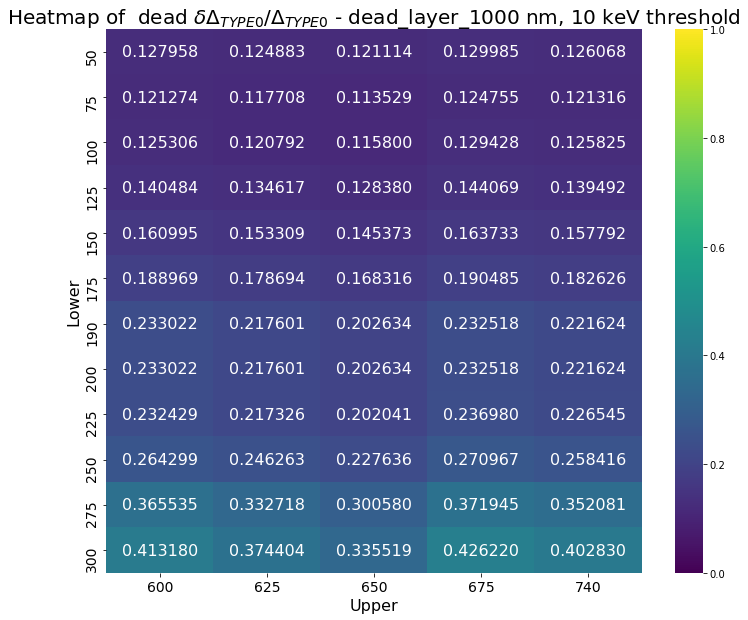

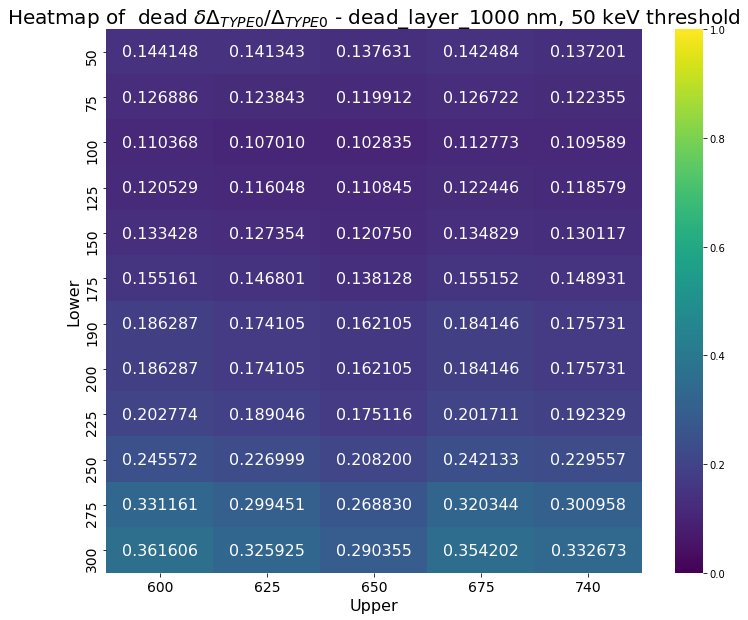

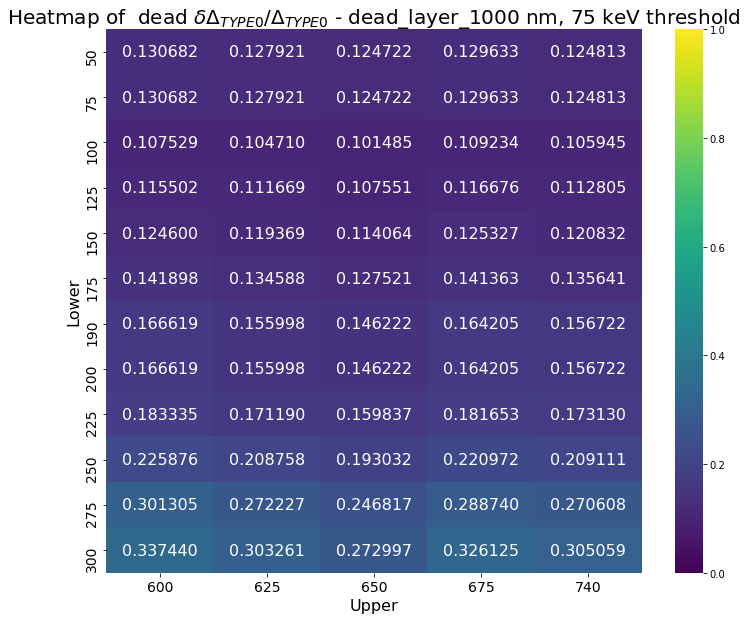

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the uploaded CSV file
df = pd.read_csv('../ucnaPlus_dead_all_thickness_all_threshold_10.csv')

# Function to create and save heatmap for a specific thickness and threshold
def create_heatmap(thickness, threshold):
    # Filter the DataFrame based on the selected thickness and threshold
    filtered_df = df[(df['thickness'] == thickness) & (df['threshold'] == threshold)]
    
    # Pivot the DataFrame to prepare for heatmap
    pivot_table = filtered_df.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis", annot_kws={"size": 16}, vmin=0.0, vmax=1.0)

    # Increase font size for axis labels and title
    plt.xlabel('Upper', fontsize=16)
    plt.ylabel('Lower', fontsize=16)

    # Increase font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Title and saving the plot
    title = f"Heatmap of  dead $\delta \Delta_{{TYPE 0}}/\Delta_{{TYPE 0}}$ - {thickness} nm, {threshold} keV threshold"
    plt.title(title, fontsize=20)
    #plt.savefig(f'../visualisation/HeatmapCorrectionsPrecisionType0Thresolwithoutdead_{thickness}_{threshold}.png')
    #plt.savefig(f'../visualisation/HeatmapCorrectionsPrecisionType0Thresolwithoutdead_{thickness}_{threshold}.eps')

    # Show the plot




    plt.show()

# Example usage
create_heatmap('dead_layer_0', 0)
create_heatmap('dead_layer_0', 10)
create_heatmap('dead_layer_0', 50)
create_heatmap('dead_layer_0', 75)

create_heatmap('dead_layer_630', 0)
create_heatmap('dead_layer_630', 10)
create_heatmap('dead_layer_630', 50)
create_heatmap('dead_layer_630', 75)

create_heatmap('dead_layer_1000', 0)
create_heatmap('dead_layer_1000', 10)
create_heatmap('dead_layer_1000', 50)
create_heatmap('dead_layer_1000', 75)


In [5]:
df.columns

Index(['Unnamed: 0', 'eLower', 'eUpper', 'dead_asymmetry_thrown_beta',
       'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
       'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta',
       'err_dead_corrected_asymmetry_type0_beta', 'dead_correction_misbs',
       'dead_correction_misbs_thrown', 'err_dead_correction_misbs',
       'err_dead_correction_misbs_thrown', 'threshold', 'thickness',
       'dead_precision_type0_corrected_asymmetry',
       'dead_precision_type0_correction', 'n_KE', 'n_Type0', 'n_Type1',
       'weighted_corrected_asymmetry_type0', 'dead_err_weight',
       'err_dead_weighted_corrected_asymmetry_type0'],
      dtype='object')

# ANOTHHER OLD WORK

# July 29 

There could be two ways to get the corrected asymmtries by multiplying the asymmeteries in a bin with their indiidual weight ad then fitting it. 
2. would be to multiply the asymmetires with the total weight

In [ ]:
merged_df[['dead_weighted_corrected_asymmetry_type0','dead_corrected_asymmetry_type0_beta','dead_EdepType0;1', 'dead_KE;1','eLower','eUpper']]

In [2]:
import numpy as np
import pandas as pd
zero = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_0.csv')
ten = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_10.csv')
fifty  = pd.read_csv('../data/ucnaPlus_dead_without_dead_threshold_50.csv')

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
zero.head()

In [114]:
zero.columns

Index(['Unnamed: 0', 'eLower', 'eUpper', 'dead_asymmetry_thrown_beta',
       'dead_asymmetry_type0_beta', 'dead_corrected_asymmetry_type0_beta',
       'withoutdead_asymmetry_thrown_beta', 'withoutdead_asymmetry_type0_beta',
       'withoutdead_corrected_asymmetry_type0_beta',
       'err_dead_asymmetry_thrown_beta', 'err_dead_asymmetry_type0_beta',
       'err_dead_corrected_asymmetry_type0_beta',
       'err_withoutdead_asymmetry_thrown_beta',
       'err_withoutdead_asymmetry_type0_beta',
       'err_withoutdead_corrected_asymmetry_type0_beta',
       'dead_correction_misbs', 'dead_correction_misbs_thrown',
       'withoutdead_correction_misbs', 'withoutdead_correction_misbs_thrown',
       'err_dead_correction_misbs', 'err_dead_correction_misbs_thrown',
       'err_withoutdead_correction_misbs',
       'err_withoutdead_correction_misbs_thrown',
       'dead_precision_type0_corrected_asymmetry',
       'withoutdead_precision_type0_corrected_asymmetry',
       'dead_precision_type0_

In [ ]:
zero['dead_precision_type0_correction'].min()

In [ ]:
zero[['dead_corrected_asymmetry_type0_beta','withoutdead_corrected_asymmetry_type0_beta', 'err_dead_corrected_asymmetry_type0_beta','err_withoutdead_corrected_asymmetry_type0_beta','eUpper', 'eLower']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of dead $A_{corr, TYPE 0}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_0.png')
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_0.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of dead $A_{corr, TYPE 0}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_10.png')
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_10.eps')

# Show the plot
plt.show()


In [ ]:
zero.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_corrected_asymmetry_type0_beta')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.12, vmax = -0.118)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $A_{corr, TYPE 0}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_50.png')
#plt.savefig('../visualisation/HeatmapCorrectedType0Thresolwithoutdead_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/Heatmapdead_precision_type0_corrected_asymmetry_0.png')
#plt.savefig('../visualisation/Heatmapdead_precision_type0_corrected_asymmetry_0.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/dead_precision_type0_corrected_asymmetry_50.png')
#plt.savefig('../visualisation/dead_precision_type0_corrected_asymmetry_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  without dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_50.png')
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_50.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  withoudead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_10.png')
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_10.eps')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_precision_type0_corrected_asymmetry')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16},vmin = -0.015, vmax = -0.005)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\frac{\delta A_{corr, TYPE 0}}{A_{corr, TYPE 0}}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_0.png')
#plt.savefig('../visualisation/withoutdead_precision_type0_corrected_asymmetry_0.eps')

# Show the plot
plt.show()


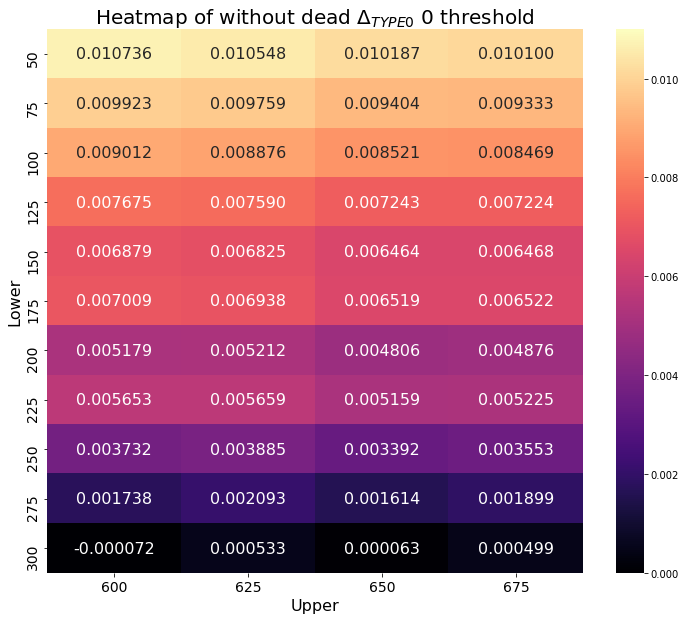

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_0.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_0.eps')

# Show the plot
plt.show()


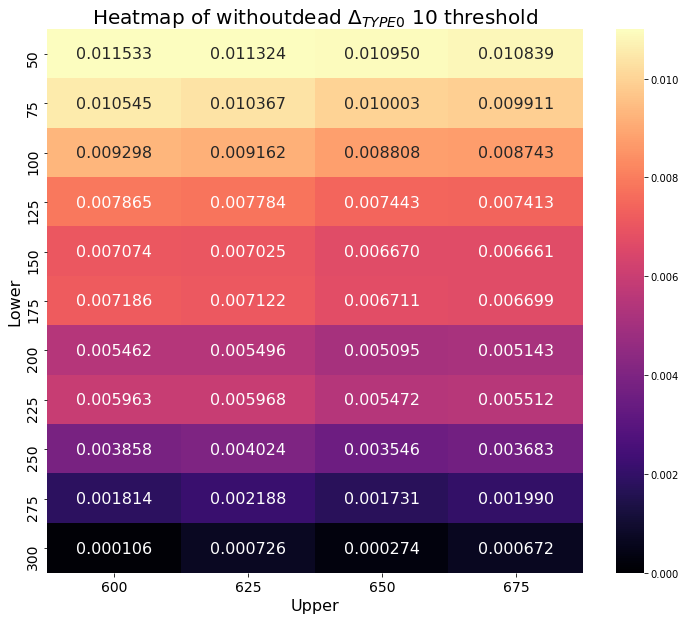

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16},vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of withoutdead $\Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_10.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_10.eps')

# Show the plot
plt.show()


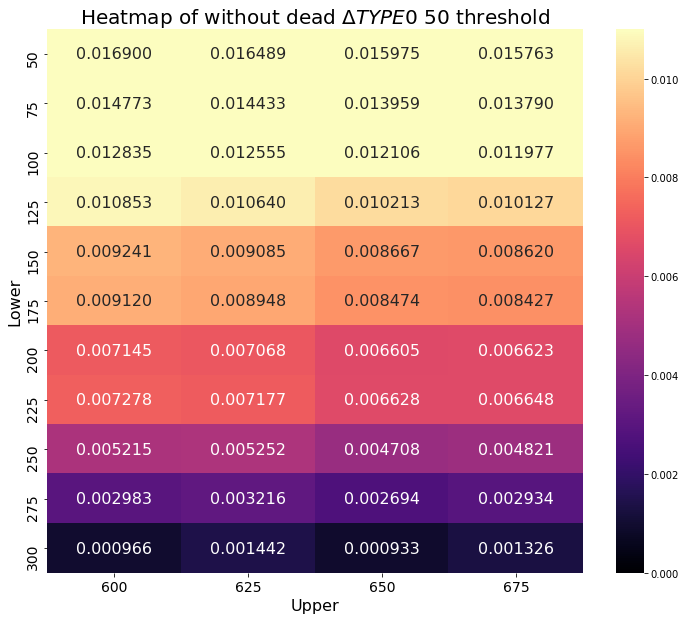

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'withoutdead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of without dead $\Delta{TYPE 0}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_50.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresolwithoutdead_50.eps')

# Show the plot
plt.show()


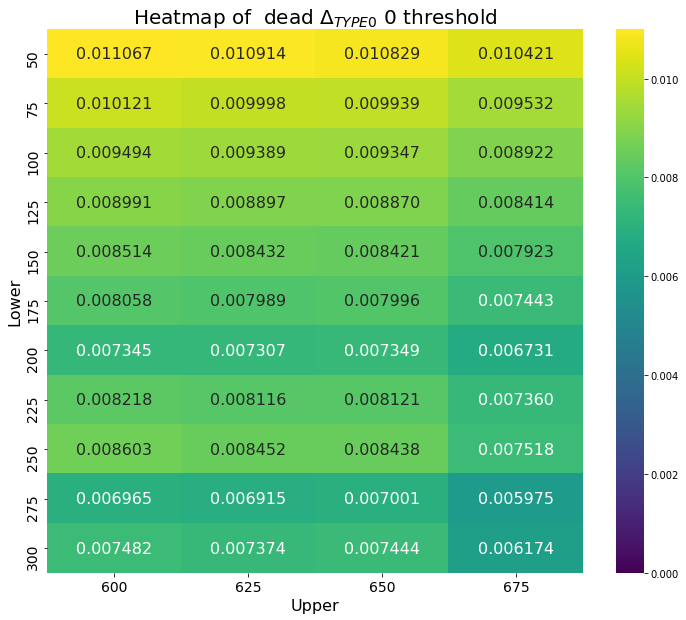

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresoldead_0.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType0Thresoldead_0.eps')

# Show the plot
plt.show()


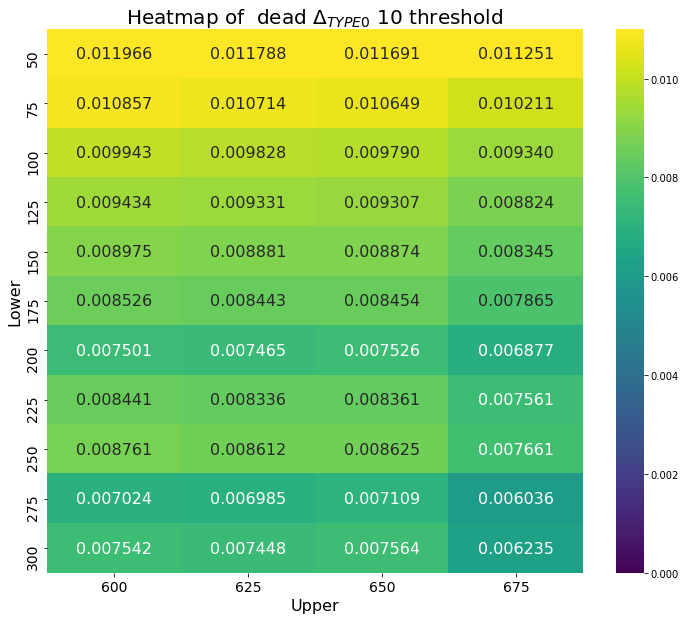

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_0.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_0.eps')

# Show the plot
plt.show()


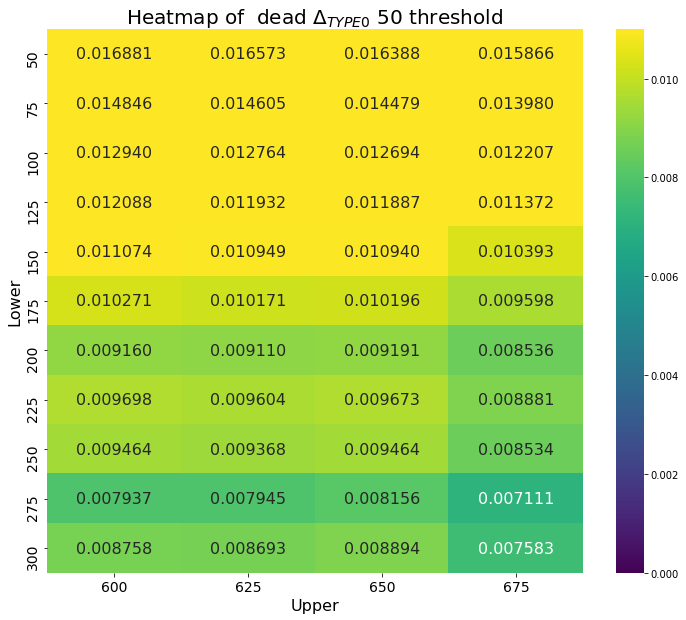

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_correction_misbs')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.011)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_50.png')
#plt.savefig('../visualisation/HeatmapCorrectionsType10Thresoldead_50.eps')

# Show the plot
plt.show()


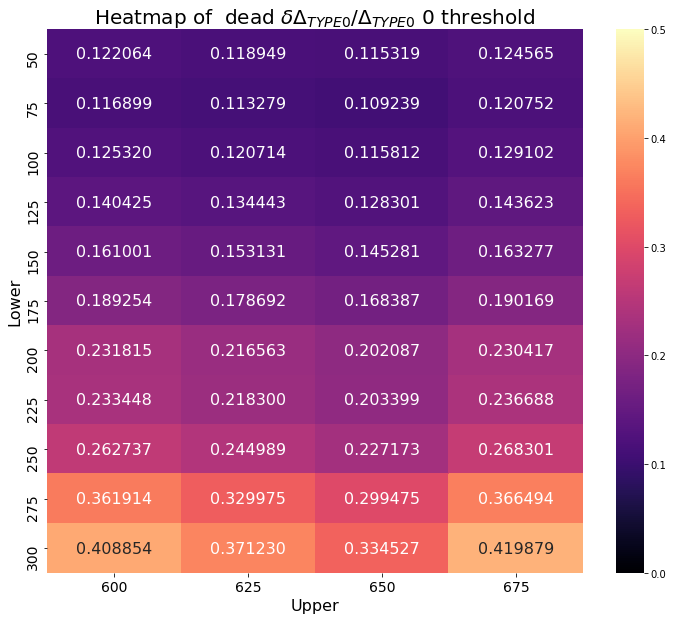

In [139]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_dead_correction_misbs_0.png')
#plt.savefig('../visualisation/err_dead_correction_misbs_0.eps')

# Show the plot
plt.show()


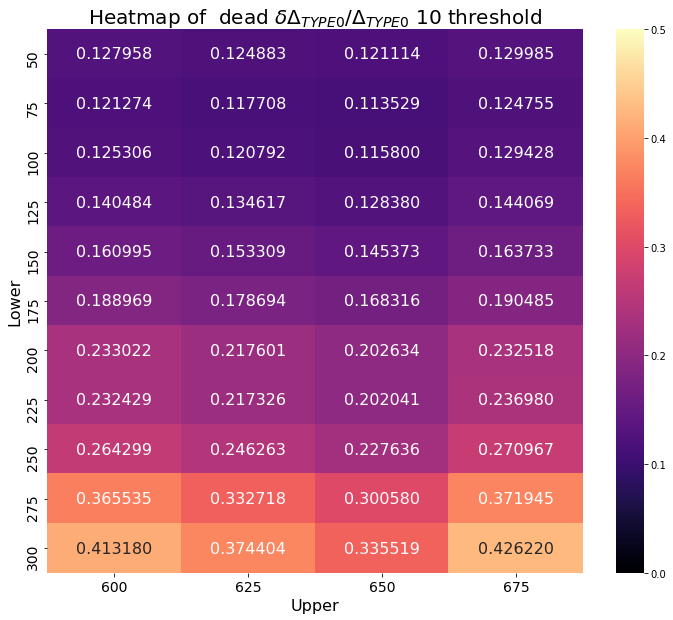

In [134]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_dead_correction_misbs_10.png')
#plt.savefig('../visualisation/err_dead_correction_misbs_10.eps')

# Show the plot
plt.show()


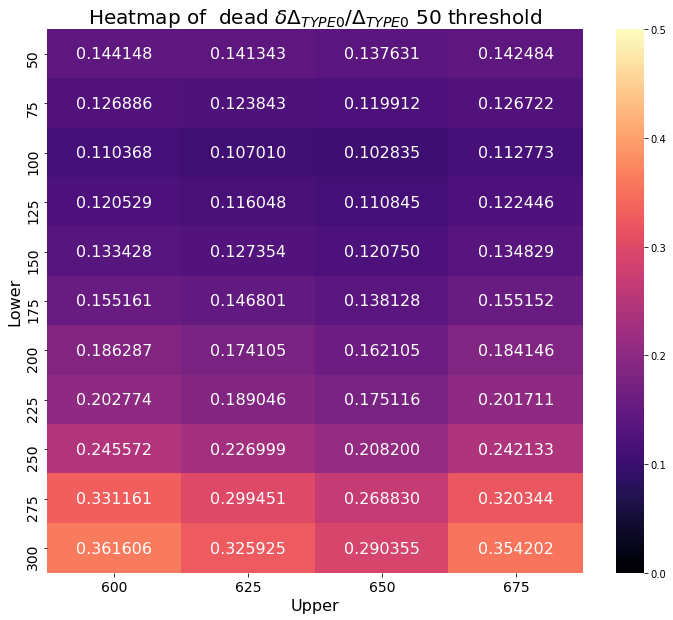

In [135]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="magma",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of  dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_dead_correction_misbs_50.png')
#plt.savefig('../visualisation/err_dead_correction_misbs_50.eps')

# Show the plot
plt.show()


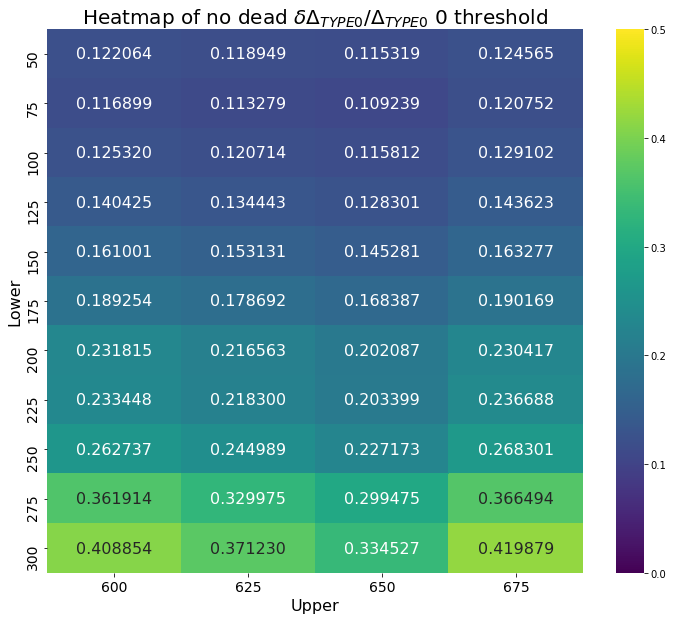

In [138]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = zero.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 0 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_0.png')
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_0.eps')

# Show the plot
plt.show()


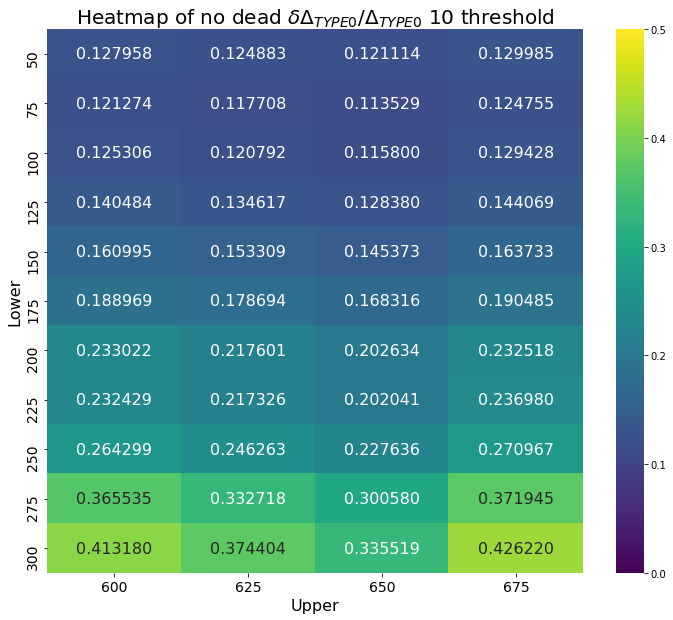

In [140]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = ten.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 10 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_10.png')
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_10.eps')

# Show the plot
plt.show()


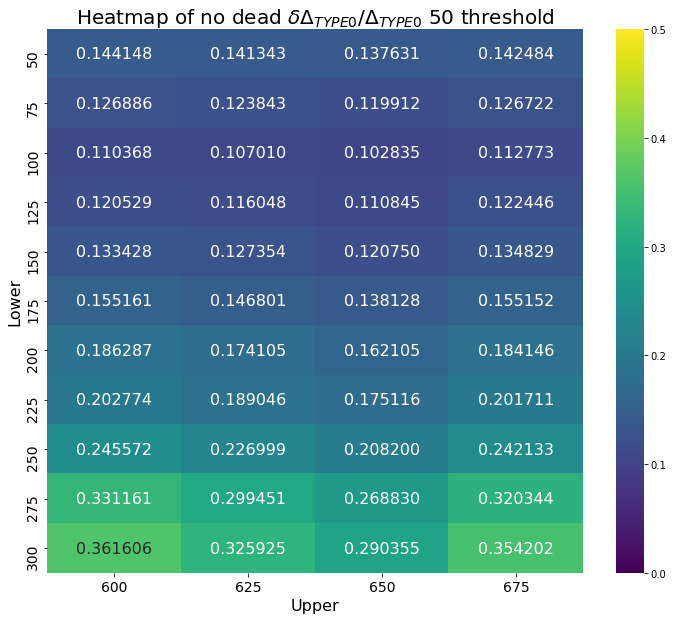

In [141]:

# Pivot the DataFrame to prepare for heatmap
pivot_table = fifty.pivot('eLower', 'eUpper', 'dead_precision_type0_correction')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="viridis",annot_kws={"size": 16}, vmin = 0.0, vmax = 0.50)
# Increase font size for axis labels and title
plt.xlabel('Upper', fontsize=16)
plt.ylabel('Lower', fontsize=16)

# Increase font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title(r'Heatmap of no dead $\delta\Delta_{TYPE 0}/ \Delta_{TYPE 0}$ 50 threshold', fontsize = 20)
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_50.png')
#plt.savefig('../visualisation/err_withoutdead_correction_misbs_50.eps')

# Show the plot
plt.show()


# OLD WORK

#ucnaP_dead_path   = "/home/rhythm/Research/ml/research/2024/jul/new/data/dead_layer_histogram_all.root" #UCNA
#ucnaP_nodead_path = "/home/rhythm/Research/ml/research/2024/jul/new/data/nodead_layer_histogram_all.root" #UCNA
#ucnaP_dead_path   = "/home/rhythm/Research/ml/research/2024/jul/new/data/dead_layer_histogram_all.root" #UCNA
#ucnaP_nodead_path = "/home/rhythm/Research/ml/research/2024/jul/new/data/nodead_layer_histogram_all.root" #UCNA
ucnaP_dead   =uproot.open(ucnaP_dead_path)  
ucnaP_nodead =uproot.open(ucnaP_nodead_path)

In [ ]:

#dead['raw_asymmetry_thrown']    = asymmetry_measured(dead['eTrue1;1'],    dead['eTrue2;1'])
#no_dead['raw_asymmetry_thrown'] = asymmetry_measured(no_dead['eTrue1;1'], no_dead['eTrue2;1'])
#dead['raw_asymmetry_type0']    = asymmetry_measured(dead['EdepType01;1'],    dead['EdepType02;1'])
#no_dead['raw_asymmetry_type0'] = asymmetry_measured(no_dead['EdepType01;1'], no_dead['EdepType02;1'])
#dead['raw_asymmetry_type1']    = asymmetry_measured(dead['EdepType11;1'],    dead['EdepType12;1'])
#no_dead['raw_asymmetry_type1'] = asymmetry_measured(no_dead['EdepType11;1'], no_dead['EdepType12;1'])
#dead['asymmetry_thrown_beta']   = asymmetry_measured(dead['eTrue1;1'],        dead['eTrue2;1'])/(beta(dead['Emid'])/2)
#no_dead['asymmetry_thrown_beta']= asymmetry_measured(no_dead['eTrue1;1'], no_dead['eTrue2;1'])/(beta(dead['Emid'])/2)
#dead['err_asymmetry_thrown_beta']   = error_asymmetry_beta(dead['eTrue1;1'],        dead['eTrue2;1'], beta(dead['Emid']))
#no_dead['err_asymmetry_thrown_beta']= error_asymmetry_beta(no_dead['eTrue1;1'], no_dead['eTrue2;1'],  beta(dead['Emid']))
#dead['asymmetry_type0_beta']    = asymmetry_measured(dead['EdepType01;1'],    dead['EdepType02;1'])/(beta(dead['Emid'])/2)
#no_dead['asymmetry_type0_beta'] = asymmetry_measured(no_dead['EdepType01;1'], no_dead['EdepType02;1'])/(beta(dead['Emid'])/2)
#dead['err_asymmetry_type0_beta']     = error_asymmetry_beta(dead['EdepType01;1'],    dead['EdepType02;1'] , beta(dead['Emid']))
#no_dead['err_asymmetry_type0_beta']  = error_asymmetry_beta(no_dead['EdepType01;1'], no_dead['EdepType02;1'], beta(no_dead['Emid']))

#dead['asymmetry_type1_beta']    = asymmetry_measured(dead['EdepType11;1'],    dead['EdepType12;1'])/(beta(dead['Emid'])/2)
#no_dead['asymmetry_type1_beta'] = asymmetry_measured(no_dead['EdepType11;1'], no_dead['EdepType12;1'])/(beta(dead['Emid'])/2)
#dead['err_asymmetry_type1_beta'] = error_asymmetry_beta(dead['EdepType11;1'],    dead['EdepType12;1'] , beta(dead['Emid']))
#no_dead['err_asymmetry_type1_beta']  = error_asymmetry_beta(no_dead['EdepType11;1'], no_dead['EdepType12;1'], beta(no_dead['Emid']))
#dead['Gamma_1_corrected'] = dead['EdepType01;1'] -dead['misEdepType01;1'] + dead['misEdepType02;1']
#dead['Gamma_2_corrected'] = dead['EdepType02;1'] -dead['misEdepType02;1'] + dead['misEdepType01;1']
 #no_dead['Gamma_1_corrected'] = no_dead['EdepType01;1'] -no_dead['misEdepType01;1'] + no_dead['misEdepType02;1']
#no_dead['Gamma_2_corrected'] = no_dead['EdepType02;1'] -no_dead['misEdepType02;1'] + no_dead['misEdepType01;1']
                   
#dead['corrected_asymmetry_type0_beta']    = asymmetry_measured(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#no_dead['corrected_asymmetry_type0_beta'] = asymmetry_measured(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#dead['corrected_asymmetry_type0_beta']    = asymmetry_measured(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#no_dead['corrected_asymmetry_type0_beta'] = asymmetry_measured(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'])/(beta(dead['Emid'])/2)
#dead['err_corrected_asymmetry_type0_beta']    = error_asymmetry_beta(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'], beta(dead['Emid']))
#no_dead['err_corrected_asymmetry_type0_beta'] = error_asymmetry_beta(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'], beta(dead['Emid']))
#dead['err_corrected_asymmetry_type0_beta']    = error_asymmetry_beta(dead['Gamma_1_corrected'],    dead['Gamma_2_corrected'], beta(dead['Emid']))
#no_dead['err_corrected_asymmetry_type0_beta'] = error_asymmetry_beta(no_dead['Gamma_1_corrected'], no_dead['Gamma_2_corrected'], beta(dead['Emid']))
#dead['fraction_type_0_individual_bin'] = dead['EdepType0;1']/dead['KE;1']
#dead['fraction_type_0_corrected_individual_bin'] = (dead['Gamma_1_corrected'] + dead['Gamma_2_corrected'])/dead['KE;1']
#no_dead['fraction_type_0_individual_bin'] = no_dead['EdepType0;1']/no_dead['KE;1']
#no_dead['fraction_type_0_corrected_individual_bin'] = (no_dead['Gamma_1_corrected'] + no_dead['Gamma_2_corrected'])/no_dead['KE;1']

In [ ]:
#dead['err_fraction_type_0_corrected_individual_bin']   = dead['fraction_type_0_corrected_individual_bin']*((np.sqrt(dead['EdepType0;1'])/dead['KE;1']) + ((dead['fraction_type_0_corrected_individual_bin'])*((np.sqrt(dead['KE;1'])/dead['KE;1'])))
#no_dead['err_fraction_type_0_corrected_individual_bin']= no_dead['fraction_type_0_corrected_individual_bin']

In [ ]:
#dead['correction_misbs']    = backscattering_corrections(A_old= dead['asymmetry_type0_beta'], A_corrected=   dead['corrected_asymmetry_type0_beta'])
#no_dead['correction_misbs'] = backscattering_corrections(no_dead['asymmetry_type0_beta'], no_dead['corrected_asymmetry_type0_beta'])
#dead['correction_misbs_thrown']    = backscattering_corrections(dead['asymmetry_thrown_beta'],    dead['corrected_asymmetry_type0_beta'])
#no_dead['correction_misbs_throws'] = backscattering_corrections(no_dead['asymmetry_thrown_beta'], no_dead['corrected_asymmetry_type0_beta'])

#dead['err_correction_thrown_misbs']    = error_backscattering_correction(A_new = dead['corrected_asymmetry_type0_beta']    , A_old = dead['asymmetry_thrown_beta']    ,err_A_new = dead['err_corrected_asymmetry_type0_beta']    ,err_A_old = dead['err_asymmetry_thrown_beta']   )
#no_dead['err_correction_thrown_misbs'] = error_backscattering_correction(A_new = no_dead['corrected_asymmetry_type0_beta'] , A_old = no_dead['asymmetry_thrown_beta'] ,err_A_new = no_dead['err_corrected_asymmetry_type0_beta'] ,err_A_old = no_dead['err_asymmetry_thrown_beta'])
#frac_type0 = np.array(nTot['EdepType0;1'])/np.array(nTot['KE;1'])
#frac_type1 = np.array(nTot['EdepType1;1'])/np.array(nTot['KE;1'])
#frac_type0 = {key: np.array(nTot[key]['EdepType0;1']) / np.array(nTot[key]['KE;1']) for key in nTot.keys()}
#frac_type1 = {key: np.array(nTot[key]['EdepType1;1']) / np.array(nTot[key]['KE;1']) for key in nTot.keys()}
